## Main takeaways:

### 1. Threshold Analysis
* Using a **20 minute threshold value** yields 272 regions who crossed threshold at various times
    * 51211.52 carless households crossed 20 minute threshold
    * 34095.0 people below poverty crossed 20 minute threshold
    * Important note: average change for people who cross this threshold is 2 minutes
    
    
* Using a **30 minute threshold value** yields 431 regions who crossed threshold at various times
    * 43404.52 carless households who have crossed 30 minute threshold
    * 40100.0 people below poverty crossed 30 minute threshold
    * Important note: average change for people who cross this threshold is 3 minutes
    
    
### 2. Simple Increase Analysis
* 374 regions had increase in **10 minutes** to nearest clinic
  * 4155.35 of those carless were carless
  * 14085.0 of those people were below poverty value
* 96 regions had increase in **15 minutes** to nearest clinic
  * 1258.39 of those households were carless
  * 4960.0 of those people below poverty value
* 17 regions had increase in **20 minutes** to nearest clinic
  * 456.42 of those households were carless
  * 685.0 of those people were below poverty value




In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data_dir = '/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/'

In [2]:
LICOdata = pd.read_csv(data_dir + 'LICODATADALevel.csv')

In [3]:
toronto_das = LICOdata[LICOdata['COL4'] == 'Toronto']

In [4]:
carless = gpd.read_file('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/GTAWithVarsForMaps/GTAWithVarsForMaps.shp')
employ = pd.read_csv(data_dir + 'DA employment counts/DA_EMP_2016.csv')
travel_diff = gpd.read_file(data_dir + 'results/travel_time_diff/travel_time_diff_2.shp')
clinics_gdf = gpd.read_file('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/clinic_shp/clean_clinics_v3.shp')
low_income_cutoff = pd.read_csv('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/low_income_cutoff/LICODataDALevel.csv')
DA_income = pd.read_csv(data_dir + 'census_data/DA_income.csv')

In [5]:
carless['DAUID'] = carless['DAUID'].astype(int)

In [6]:
carless = carless[carless['DAUID'].isin(toronto_das['COL0'])]

In [7]:
carless = carless.merge(DA_income, left_on='DAUID', right_on='GeoUID')

In [8]:
carless['PCTCarless'] = carless['PCTCarless'] * 0.01

In [9]:
carless['pop_carless'] = carless['PCTCarless'] * carless['Population']

In [10]:
carless = carless.merge(travel_diff, left_on='DAUID', right_on='fromId')

In [11]:
carless.drop_duplicates('DAUID')['pop_carless'].sum()

657335.5682258331

## Threshold 20 Minutes

In [12]:
carless['2019_u20'] = carless['tt_2019'] < 20
carless['2020_o20'] = carless['tt_2020'] >= 20

In [13]:
carless['thres'] = (carless['2019_u20'] == True) & (carless['2020_o20'] == True)

In [14]:
carless = gpd.GeoDataFrame(carless, geometry='geometry_y')

/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


<AxesSubplot:>

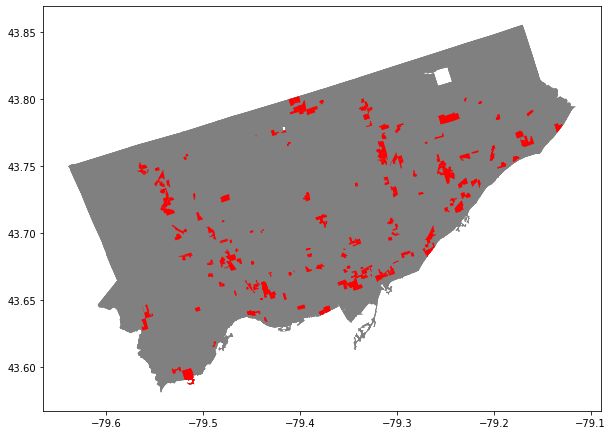

In [15]:
fig, ax = plt.subplots(figsize=(10,10))
carless.plot(ax=ax, color='grey')
carless[carless['thres']==1].plot(column='thres', color = 'red', ax=ax)

In [16]:
len(carless[carless['thres'] == True]['DAUID'].unique())

256

In [17]:
np.nansum(carless[carless['thres'] == True]['pop_carless'].unique())

49090.297689644605

In [18]:
carless[carless['thres'] == True]['diff'].describe()

count    421.000000
mean       2.332542
std        1.401907
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        7.000000
Name: diff, dtype: float64

In [19]:
low_income_cutoff = pd.read_csv('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/low_income_cutoff/LICODataDALevel.csv')

In [20]:
carless[carless['thres']==True].merge(low_income_cutoff, left_on='GeoUID_y', right_on='COL0').drop_duplicates('DAUID')['COL7'].sum()

31440.0

## Threshold 30 Minutes

In [35]:
carless['2019_u20'] = carless['tt_2019'] < 30
carless['2020_o20'] = carless['tt_2020'] >= 30

In [36]:
carless['thres'] = (carless['2019_u20'] == True) & (carless['2020_o20'] == True)

In [37]:
carless['thres'].value_counts()

False    14276
True       520
Name: thres, dtype: int64

In [38]:
carless = gpd.GeoDataFrame(carless, geometry='geometry_y')

/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


<AxesSubplot:>

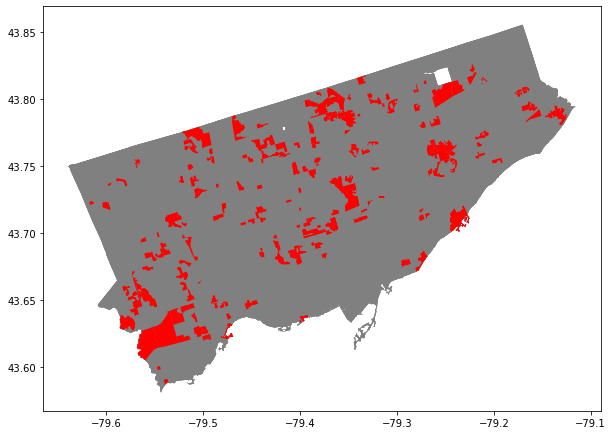

In [39]:
fig, ax = plt.subplots(figsize=(10,10))
carless.plot(ax=ax, color='grey')
carless[carless['thres']==1].plot(column='thres', color = 'red', ax=ax)

In [40]:
len(carless[carless['thres'] == True]['DAUID'].unique())

323

In [41]:
np.nansum(carless[carless['thres'] == True]['pop_carless'].unique())

39114.340017332695

In [42]:
carless[carless['thres'] == True]['diff'].describe()

count    520.000000
mean       2.790385
std        1.605717
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max       10.000000
Name: diff, dtype: float64

In [43]:
low_income_cutoff = pd.read_csv('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/low_income_cutoff/LICODataDALevel.csv')


In [44]:
carless[carless['thres']==True].merge(low_income_cutoff, left_on='GeoUID_y', right_on='COL0').drop_duplicates('DAUID')['COL7'].sum()

32880.0

## Increase by 10 Mins

In [76]:
carless['thres'] = carless['diff'] >= 10

In [77]:
carless['thres'].value_counts()

False    14790
True         6
Name: thres, dtype: int64

In [78]:
carless = gpd.GeoDataFrame(carless, geometry='geometry_y')

/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


<AxesSubplot:>

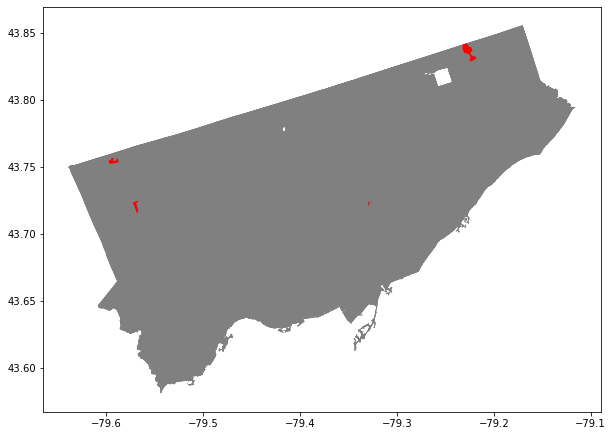

In [79]:
fig, ax = plt.subplots(figsize=(10,10))
carless.plot(ax=ax, color='grey')
carless[carless['thres']==1].plot(column='thres', color = 'red', ax=ax)

In [49]:
thres_carless = carless[carless['thres']==1]

### Number of carless who now have >=10 min increase in travel time if taking public transport

In [50]:
thres_carless.drop_duplicates('DAUID')['pop_carless'].sum()

223.9147952123572

### Number of low income who now have >=10 min increase in travel time if taking public transport

In [51]:
low_income_cutoff = pd.read_csv('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/low_income_cutoff/LICODataDALevel.csv')
thres_carless[thres_carless['thres']==True].merge(low_income_cutoff, left_on='GeoUID_y', right_on='COL0').drop_duplicates('DAUID')['COL7'].sum()

255.0

## Increase by 15 Mins

In [52]:
carless['thres'] = carless['diff'] >= 15

In [53]:
carless['thres'].value_counts()

False    14796
Name: thres, dtype: int64

In [54]:
carless = gpd.GeoDataFrame(carless, geometry='geometry_y')

In [55]:
fig, ax = plt.subplots(figsize=(10,10))
carless.plot(ax=ax, color='grey')
carless[carless['thres']==1].plot(column='thres', color = 'red', ax=ax)

/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(
/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


<AxesSubplot:>

ValueError: cannot convert float NaN to integer

<Figure size 720x720 with 1 Axes>

In [56]:
thres_carless = carless[carless['thres']==1]

### Number of carless who now have >=15 min increase in  travel time if taking public transport

In [57]:
np.nansum(thres_carless['pop_carless'].unique())

0.0

### Number of low income who now have >=15 min increase in travel time if taking public transport

In [58]:
low_income_cutoff = pd.read_csv('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/low_income_cutoff/LICODataDALevel.csv')
thres_carless[thres_carless['thres']==True].merge(low_income_cutoff, left_on='GeoUID_y', right_on='COL0').drop_duplicates('DAUID')['COL7'].sum()

0.0

## Increase by 20 Mins

In [59]:
carless['thres'] = carless['diff'] >= 20

In [60]:
carless['thres'].value_counts()

False    14796
Name: thres, dtype: int64

In [61]:
carless = gpd.GeoDataFrame(carless, geometry='geometry_y')

In [62]:
fig, ax = plt.subplots(figsize=(10,10))
carless.plot(ax=ax, color='grey')
carless[carless['thres']==1].plot(column='thres', color = 'red', ax=ax)

/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(
/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


<AxesSubplot:>

ValueError: cannot convert float NaN to integer

<Figure size 720x720 with 1 Axes>

In [63]:
thres_carless = carless[carless['thres']==1]

### Number of carless who now have >=20 min increase in  travel time if taking public transport

In [64]:
np.nansum(thres_carless['pop_carless'].unique())

0.0

### Number of low income who now have >=20 min increase in travel time if taking public transport

In [65]:
low_income_delays.drop_duplicates('COL0')['COL7'].sum()

NameError: name 'low_income_delays' is not defined

# Average Over Time

In [4]:
times = ['0800', '1100', '1500', '0900_sat']
travel_diff_dic = {}
low_income_dic = {}
for time in times:
    travel_diff_dic[time] = travel_diff[travel_diff['time']==time]
    low_income_dic[time] = travel_diff_dic[time][(travel_diff_dic[time]['neg_access']==1) & (travel_diff_dic[time]['income_quintile']==0)]

/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


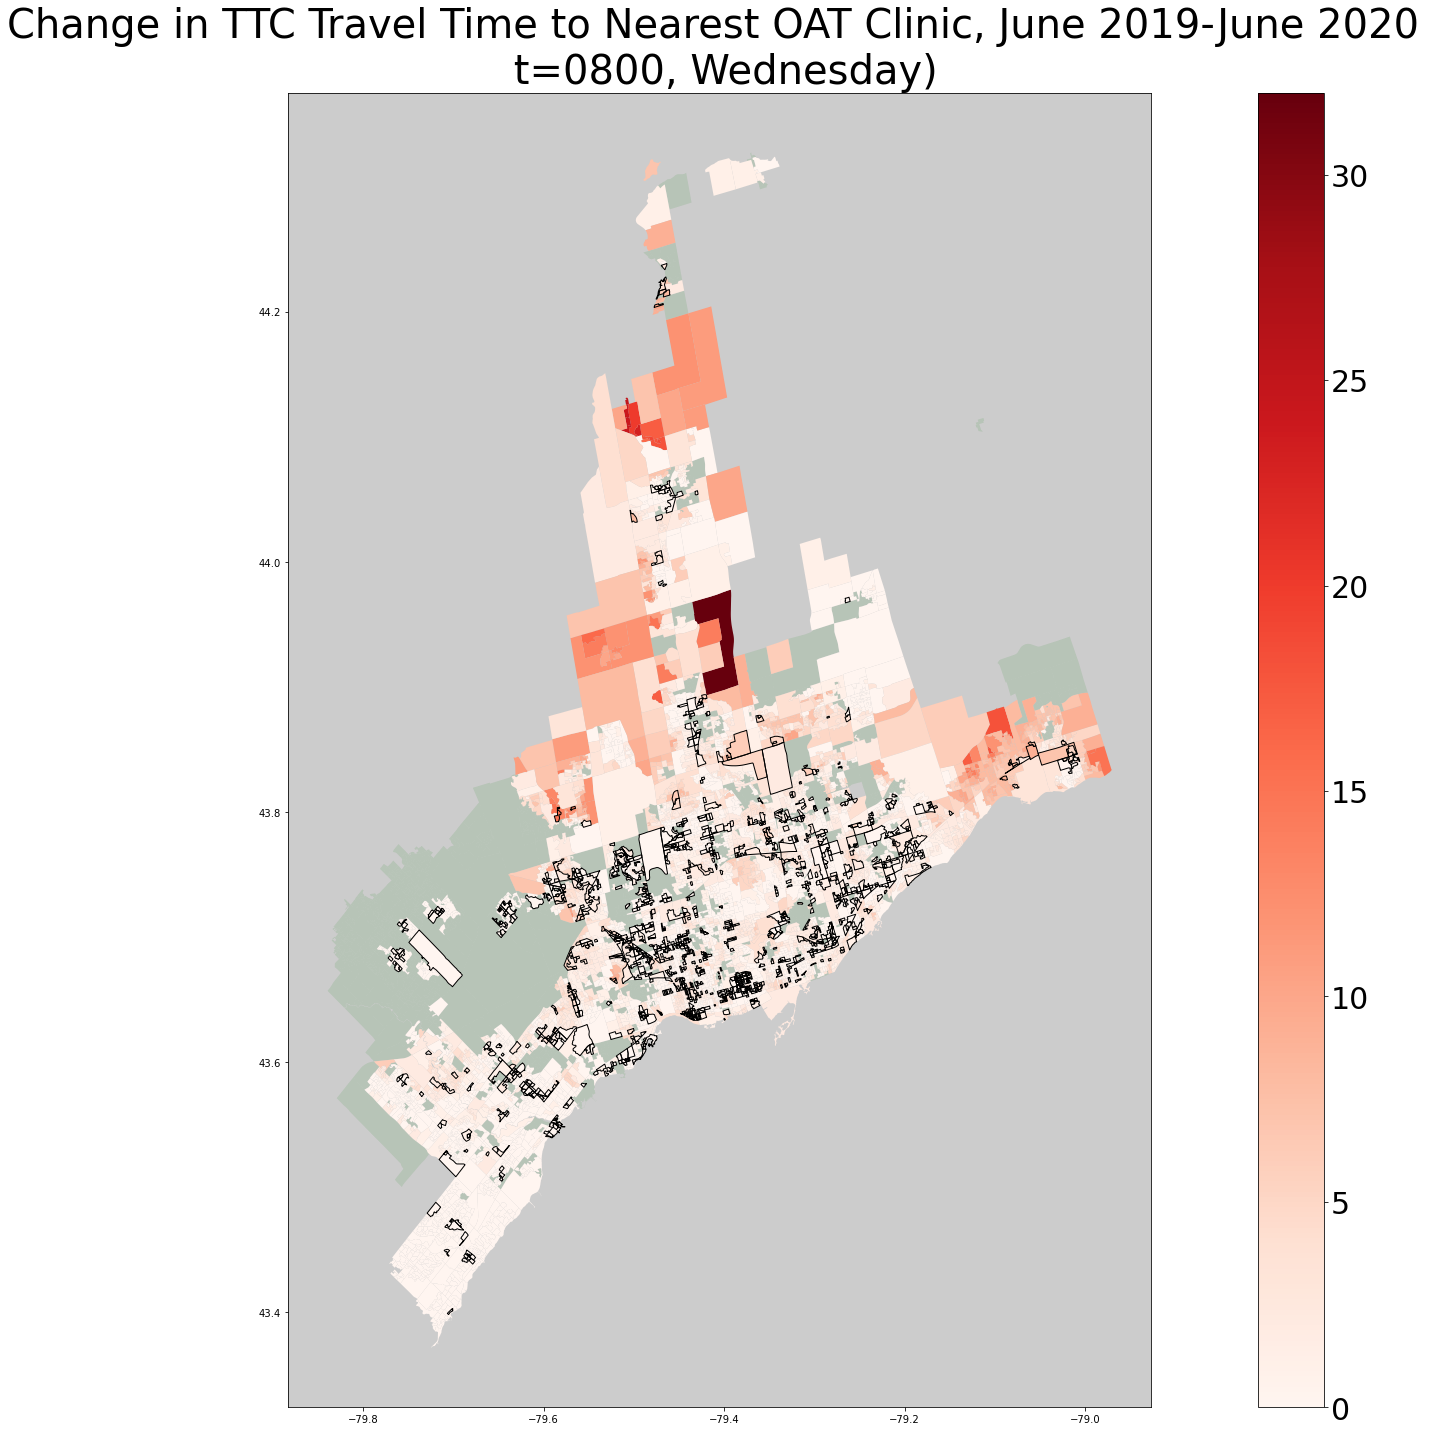

In [5]:
time = '0800'
fig, ax = plt.subplots(figsize=(30, 20))
travel_diff_dic[time][travel_diff_dic[time]['neg_access']==0].plot(column='diff', ax=ax, legend=True, color='green', alpha=0.1)
travel_diff_dic[time][travel_diff_dic[time]['neg_access']==1].plot(column='diff', ax=ax, cmap='Reds', legend=True)
low_income_dic[time].plot(facecolor='none', edgecolor='black', linewidth=1, ax=ax)
cb_ax = fig.axes[1]
ax.patch.set_facecolor('black')
ax.patch.set_alpha(0.2)
plt.title(f"Change in TTC Travel Time to Nearest OAT Clinic, June 2019-June 2020 \n t={time}, Wednesday)", fontsize=40)
cb_ax.tick_params(labelsize=30)
plt.tight_layout()
#plt.savefig(f'/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/imgs/{time}.png')

In [390]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data_dir = '/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/'

In [391]:
LICOdata = pd.read_csv(data_dir + 'LICODATADALevel.csv')

In [392]:
toronto_das = LICOdata[LICOdata['COL4'] == 'Toronto']

In [393]:
carless = gpd.read_file('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/GTAWithVarsForMaps/GTAWithVarsForMaps.shp')
employ = pd.read_csv(data_dir + 'DA employment counts/DA_EMP_2016.csv')
travel_diff = gpd.read_file(data_dir + 'results/travel_time_diff/travel_time_diff_2.shp')
clinics_gdf = gpd.read_file('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/clinic_shp/clean_clinics_v3.shp')
low_income_cutoff = pd.read_csv('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/low_income_cutoff/LICODataDALevel.csv')
DA_income = pd.read_csv(data_dir + 'census_data/DA_income.csv')

In [394]:
carless['DAUID'] = carless['DAUID'].astype(int)

In [395]:
carless = carless[carless['DAUID'].isin(toronto_das['COL0'])]

In [396]:
carless = carless.merge(DA_income, left_on='DAUID', right_on='GeoUID')

In [397]:
carless['PCTCarless'] = carless['PCTCarless'] * 0.01

In [398]:
carless['pop_carless'] = carless['PCTCarless'] * carless['Population']

In [399]:
carless = carless.merge(travel_diff, left_on='DAUID', right_on='fromId')

In [400]:
carless.drop_duplicates('DAUID')['pop_carless'].sum()

657335.5682258331

In [401]:
travel_time_averages = carless.groupby(['DAUID'])['tt_2019', 'tt_2020', 'diff'].mean()

<ipython-input-401-8e78b900c63f>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  travel_time_averages = carless.groupby(['DAUID'])['tt_2019', 'tt_2020', 'diff'].mean()


In [402]:
travel_time_averages.reset_index(inplace=True)

In [403]:
carless.drop_duplicates('DAUID', inplace=True)

In [404]:
carless = travel_time_averages.merge(carless, on='DAUID')

## Threshold 20 Minutes

In [406]:
carless['2019_u20'] = carless['tt_2019_x'] < 20
carless['2020_o20'] = carless['tt_2020_x'] >= 20

In [407]:
carless['thres'] = (carless['2019_u20'] == True) & (carless['2020_o20'] == True)

In [408]:
carless = gpd.GeoDataFrame(carless, geometry='geometry_y')

/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


<AxesSubplot:>

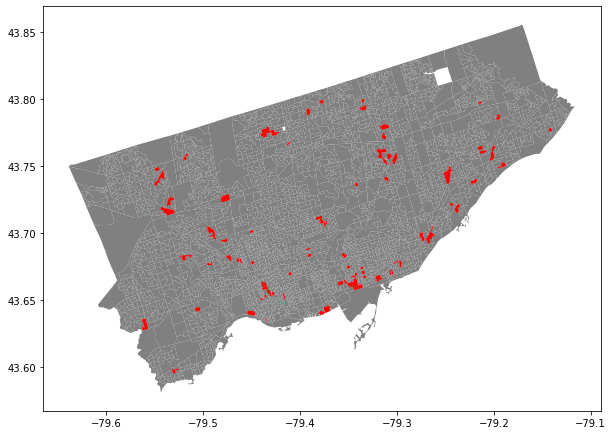

In [123]:
fig, ax = plt.subplots(figsize=(10,10))
carless.plot(ax=ax, color='grey')
carless[carless['thres']==1].plot(column='thres', color = 'red', ax=ax)

In [409]:
len(carless[carless['thres'] == True]['DAUID'].unique())

107

In [410]:
np.nansum(carless[carless['thres'] == True]['pop_carless'].unique())

21127.916806092097

In [411]:
carless[carless['thres'] == True]['diff_x'].describe()

count    107.000000
mean       1.796729
std        1.329159
min        0.250000
25%        0.875000
50%        1.500000
75%        2.250000
max        6.750000
Name: diff_x, dtype: float64

In [412]:
low_income_cutoff = pd.read_csv('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/low_income_cutoff/LICODataDALevel.csv')

In [413]:
carless[carless['thres']==True].merge(low_income_cutoff, left_on='GeoUID_y', right_on='COL0').drop_duplicates('DAUID')['COL7'].sum()

14445.0

## Threshold 30 Minutes

In [414]:
carless['2019_u20'] = carless['tt_2019_x'] < 30
carless['2020_o20'] = carless['tt_2020_x'] >= 30

In [415]:
carless['thres'] = (carless['2019_u20'] == True) & (carless['2020_o20'] == True)

In [416]:
carless['thres'].value_counts()

False    3593
True      106
Name: thres, dtype: int64

In [417]:
carless = gpd.GeoDataFrame(carless, geometry='geometry_y')

/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


<AxesSubplot:>

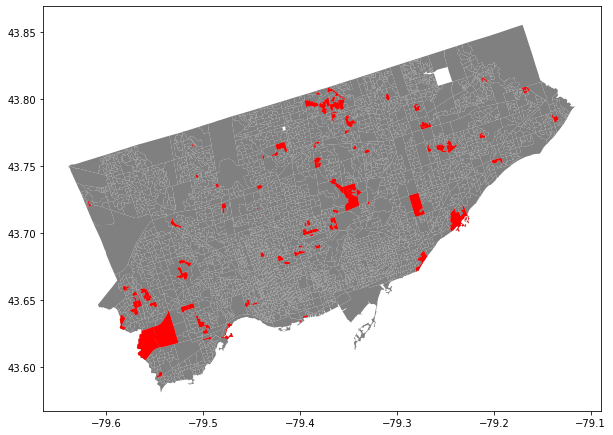

In [134]:
fig, ax = plt.subplots(figsize=(10,10))
carless.plot(ax=ax, color='grey')
carless[carless['thres']==1].plot(column='thres', color = 'red', ax=ax)

In [418]:
len(carless[carless['thres'] == True]['DAUID'].unique())

106

In [419]:
np.nansum(carless[carless['thres'] == True]['pop_carless'].unique())

11342.646667917055

In [420]:
carless[carless['thres'] == True]['diff_x'].describe()

count    106.000000
mean       2.058962
std        1.058723
min        0.250000
25%        1.312500
50%        2.000000
75%        2.750000
max        6.750000
Name: diff_x, dtype: float64

In [421]:
low_income_cutoff = pd.read_csv('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/low_income_cutoff/LICODataDALevel.csv')


In [422]:
carless[carless['thres']==True].merge(low_income_cutoff, left_on='GeoUID_y', right_on='COL0').drop_duplicates('DAUID')['COL7'].sum()

8805.0

## Increase by 10 Mins

In [141]:
carless['thres'] = carless['diff_x'] >= 10

In [142]:
carless['thres'].value_counts()

False    3699
Name: thres, dtype: int64

In [143]:
carless = gpd.GeoDataFrame(carless, geometry='geometry_y')

In [144]:
fig, ax = plt.subplots(figsize=(10,10))
carless.plot(ax=ax, color='grey')
carless[carless['thres']==1].plot(column='thres', color = 'red', ax=ax)

/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(
/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


<AxesSubplot:>

ValueError: cannot convert float NaN to integer

<Figure size 720x720 with 1 Axes>

In [145]:
thres_carless = carless[carless['thres']==1]

### Number of carless who now have >=10 min increase in travel time if taking public transport

In [146]:
thres_carless.drop_duplicates('DAUID')['pop_carless'].sum()

0.0

### Number of low income who now have >=10 min increase in travel time if taking public transport

In [147]:
low_income_cutoff = pd.read_csv('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/low_income_cutoff/LICODataDALevel.csv')
thres_carless[thres_carless['thres']==True].merge(low_income_cutoff, left_on='GeoUID_y', right_on='COL0').drop_duplicates('DAUID')['COL7'].sum()

0.0

## Increase by 15 Mins

In [148]:
carless['thres'] = carless['diff_x'] >= 15

In [149]:
carless['thres'].value_counts()

False    3699
Name: thres, dtype: int64

In [150]:
carless = gpd.GeoDataFrame(carless, geometry='geometry_y')

In [55]:
fig, ax = plt.subplots(figsize=(10,10))
carless.plot(ax=ax, color='grey')
carless[carless['thres']==1].plot(column='thres', color = 'red', ax=ax)

/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(
/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


<AxesSubplot:>

ValueError: cannot convert float NaN to integer

<Figure size 720x720 with 1 Axes>

In [56]:
thres_carless = carless[carless['thres']==1]

### Number of carless who now have >=15 min increase in  travel time if taking public transport

In [57]:
np.nansum(thres_carless['pop_carless'].unique())

0.0

### Number of low income who now have >=15 min increase in travel time if taking public transport

In [58]:
low_income_cutoff = pd.read_csv('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/low_income_cutoff/LICODataDALevel.csv')
thres_carless[thres_carless['thres']==True].merge(low_income_cutoff, left_on='GeoUID_y', right_on='COL0').drop_duplicates('DAUID')['COL7'].sum()

0.0

## Increase by 20 Mins

In [59]:
carless['thres'] = carless['diff'] >= 20

In [60]:
carless['thres'].value_counts()

False    14796
Name: thres, dtype: int64

In [61]:
carless = gpd.GeoDataFrame(carless, geometry='geometry_y')

In [62]:
fig, ax = plt.subplots(figsize=(10,10))
carless.plot(ax=ax, color='grey')
carless[carless['thres']==1].plot(column='thres', color = 'red', ax=ax)

/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(
/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


<AxesSubplot:>

ValueError: cannot convert float NaN to integer

<Figure size 720x720 with 1 Axes>

In [63]:
thres_carless = carless[carless['thres']==1]

### Number of carless who now have >=20 min increase in  travel time if taking public transport

In [64]:
np.nansum(thres_carless['pop_carless'].unique())

0.0

### Number of low income who now have >=20 min increase in travel time if taking public transport

In [65]:
low_income_delays.drop_duplicates('COL0')['COL7'].sum()

NameError: name 'low_income_delays' is not defined

# Divided by Time

## 0800 Weekday

In [249]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data_dir = '/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/'

In [250]:
LICOdata = pd.read_csv(data_dir + 'LICODATADALevel.csv')

In [251]:
toronto_das = LICOdata[LICOdata['COL4'] == 'Toronto']

In [252]:
carless = gpd.read_file('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/GTAWithVarsForMaps/GTAWithVarsForMaps.shp')
employ = pd.read_csv(data_dir + 'DA employment counts/DA_EMP_2016.csv')
travel_diff = gpd.read_file(data_dir + 'results/travel_time_diff/travel_time_diff_2.shp')
clinics_gdf = gpd.read_file('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/clinic_shp/clean_clinics_v3.shp')
low_income_cutoff = pd.read_csv('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/low_income_cutoff/LICODataDALevel.csv')
DA_income = pd.read_csv(data_dir + 'census_data/DA_income.csv')

In [253]:
carless['DAUID'] = carless['DAUID'].astype(int)

In [254]:
carless = carless[carless['DAUID'].isin(toronto_das['COL0'])]

In [258]:
carless.to_crs(epsg='3347', inplace=True)

In [263]:
carless = carless.merge(DA_income, left_on='DAUID', right_on='GeoUID')

In [267]:
carless['Area (sq km)'].mean()

0.1713761021069692

In [241]:
carless['PCTCarless'] = carless['PCTCarless'] * 0.01

In [242]:
carless['pop_carless'] = carless['PCTCarless'] * carless['Population']

In [243]:
carless = carless.merge(travel_diff, left_on='DAUID', right_on='fromId')

In [244]:
carless.drop_duplicates('DAUID')['pop_carless'].sum()

657335.5682258331

In [245]:
carless['time'].unique()

array(['0800', '1100', '1500', '0900_sat'], dtype=object)

In [246]:
carless_0800 = carless[carless['time'] == '0800']

In [209]:
#get table of NIA and top 20 delayed DAs

In [210]:
NIA = gpd.read_file('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/neighbourhood-improvement-areas-wgs84/NEIGHBOURHOOD_IMPROVEMENT_AREA_WGS84.shp')
NIA.to_crs(epsg='3857', inplace=True)

geo_0800 = gpd.GeoDataFrame(carless_0800, geometry='geometry_y')
geo_0800.set_crs(epsg='4326', inplace=True)
geo_0800.to_crs(epsg='3857', inplace=True)

merged = gpd.sjoin(geo_0800, NIA)
geo_0800 = geo_0800.merge(merged, on='DAUID', how='left')
final = geo_0800[['DAUID', 'diff_x', 'AREA_NAME']].sort_values(by='diff_x', ascending=False).reset_index().drop('index', axis=1)[0:20]

final.rename(columns={'DAUID': 'DA ID', 'diff_x': 'Travel Delay (mins)', 'AREA_NAME': 'NIA Name (if exists)'})

DA ID  Travel Delay (mins)                   NIA Name (if exists)
0   35201832                   11                                    NaN
1   35201830                   10                                    NaN
2   35203031                   10  Mount Olive-Silverstone-Jamestown (2)
3   35204712                    9                                    NaN
4   35204711                    9                                    NaN
5   35203029                    9  Mount Olive-Silverstone-Jamestown (2)
6   35204714                    9                                    NaN
7   35203030                    9  Mount Olive-Silverstone-Jamestown (2)
8   35201697                    9                                    NaN
9   35201699                    9                                    NaN
10  35201698                    8                                    NaN
11  35202992                    8                                    NaN
12  35201006                    7                                    NaN
13  35203047                    7                                    NaN
14  35201840                    7                                    NaN
15  35201831                    7                                    NaN
16  35204878                    7                   Flemingdon Park (44)
17  35203748                    7                                    NaN
18  35201833                    7                                    NaN
19  35204427                    6                           Weston (113)

### Threshold 20 Minutes

In [459]:
carless_0800['2019_u20'] = carless_0800['tt_2019'] < 20
carless_0800['2020_o20'] = carless_0800['tt_2020'] >= 20

<ipython-input-459-59367781bb2e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  carless_0800['2019_u20'] = carless_0800['tt_2019'] < 20
<ipython-input-459-59367781bb2e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  carless_0800['2020_o20'] = carless_0800['tt_2020'] >= 20


In [460]:
carless_0800['thres'] = (carless_0800['2019_u20'] == True) & (carless_0800['2020_o20'] == True)

<ipython-input-460-61b5076a39c4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  carless_0800['thres'] = (carless_0800['2019_u20'] == True) & (carless_0800['2020_o20'] == True)


In [461]:
carless_0800 = gpd.GeoDataFrame(carless_0800, geometry='geometry_y')

/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


<AxesSubplot:>

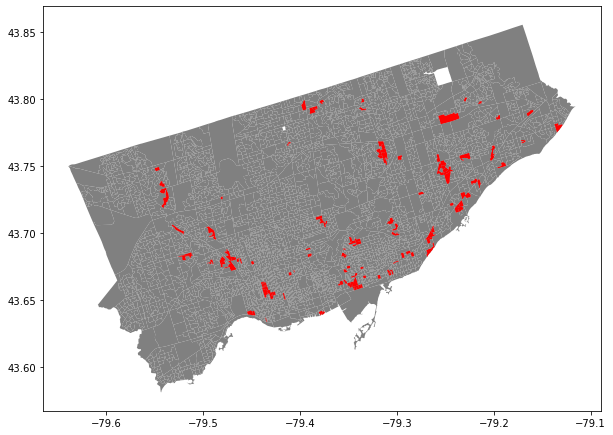

In [462]:
fig, ax = plt.subplots(figsize=(10,10))
carless_0800.plot(ax=ax, color='grey')
carless_0800[carless_0800['thres']==1].plot(column='thres', color = 'red', ax=ax)

In [463]:
len(carless_0800[carless_0800['thres'] == True]['DAUID'].unique())

126

In [464]:
np.nansum(carless_0800[carless_0800['thres'] == True]['pop_carless'].unique())

23830.42458023738

In [465]:
carless_0800[carless_0800['thres'] == True]['diff'].describe()

count    126.000000
mean       2.444444
std        1.394593
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        7.000000
Name: diff, dtype: float64

In [445]:
low_income_cutoff = pd.read_csv('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/low_income_cutoff/LICODataDALevel.csv')

In [446]:
carless_0800[carless_0800['thres']==True].merge(low_income_cutoff, left_on='GeoUID_y', right_on='COL0').drop_duplicates('DAUID')['COL7'].sum()

15130.0

### Threshold 30 Minutes

In [447]:
carless_0800['2019_u20'] = carless_0800['tt_2019'] < 30
carless_0800['2020_o20'] = carless_0800['tt_2020'] >= 30

In [448]:
carless_0800['thres'] = (carless_0800['2019_u20'] == True) & (carless_0800['2020_o20'] == True)

In [450]:
carless_0800['thres'].value_counts()

False    3561
True      138
Name: thres, dtype: int64

In [451]:
carless_0800 = gpd.GeoDataFrame(carless_0800, geometry='geometry_y')

/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


<AxesSubplot:>

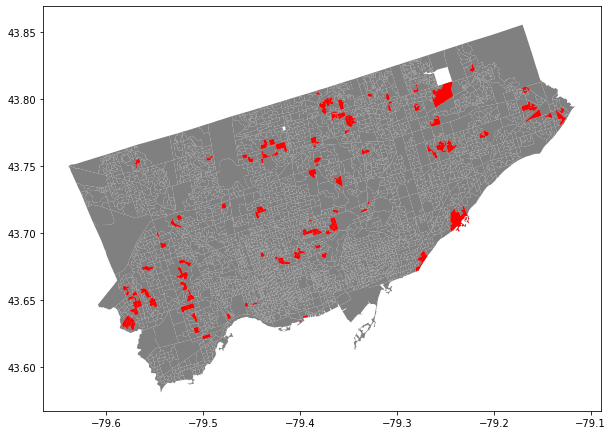

In [452]:
fig, ax = plt.subplots(figsize=(10,10))
carless_0800.plot(ax=ax, color='grey')
carless_0800[carless_0800['thres']==1].plot(column='thres', color = 'red', ax=ax)

In [453]:
len(carless_0800[carless_0800['thres'] == True]['DAUID'].unique())

138

In [454]:
np.nansum(carless_0800[carless_0800['thres'] == True]['pop_carless'].unique())

13090.964901643525

In [455]:
carless_0800[carless_0800['thres'] == True]['diff'].describe()

count    138.000000
mean       2.927536
std        1.601266
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        9.000000
Name: diff, dtype: float64

In [456]:
low_income_cutoff = pd.read_csv('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/low_income_cutoff/LICODataDALevel.csv')


In [457]:
carless_0800[carless_0800['thres']==True].merge(low_income_cutoff, left_on='GeoUID_y', right_on='COL0').drop_duplicates('DAUID')['COL7'].sum()

11805.0

### Increase by 10 Mins

In [466]:
carless_0800['thres'] = carless_0800['diff'] >= 10

In [467]:
carless_0800['thres'].value_counts()

False    3696
True        3
Name: thres, dtype: int64

In [468]:
carless_0800 = gpd.GeoDataFrame(carless_0800, geometry='geometry_y')

/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


<AxesSubplot:>

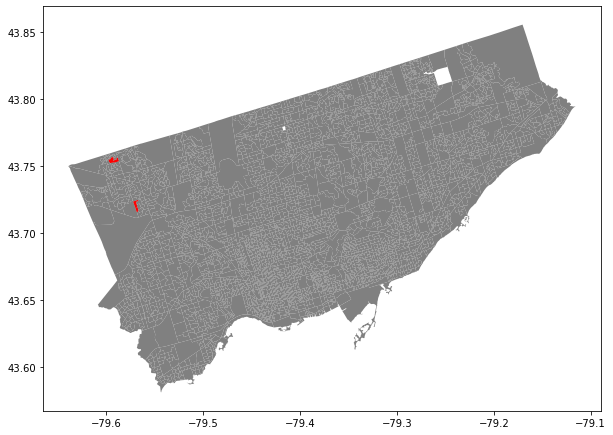

In [469]:
fig, ax = plt.subplots(figsize=(10,10))
carless_0800.plot(ax=ax, color='grey')
carless_0800[carless_0800['thres']==1].plot(column='thres', color = 'red', ax=ax)

In [470]:
thres_carless = carless_0800[carless_0800['thres']==1]

### Number of carless who now have >=10 min increase in travel time if taking public transport

In [471]:
thres_carless.drop_duplicates('DAUID')['pop_carless'].sum()

187.87713659590202

### Number of low income who now have >=10 min increase in travel time if taking public transport

In [472]:
low_income_cutoff = pd.read_csv('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/low_income_cutoff/LICODataDALevel.csv')
thres_carless[thres_carless['thres']==True].merge(low_income_cutoff, left_on='GeoUID_y', right_on='COL0').drop_duplicates('DAUID')['COL7'].sum()

170.0

### Increase by 15 Mins NONE

In [207]:
carless_0800['thres'] = carless_0800['diff'] >= 15

In [208]:
carless_0800['thres'].value_counts()

False    3699
Name: thres, dtype: int64

In [54]:
carless = gpd.GeoDataFrame(carless, geometry='geometry_y')

In [55]:
fig, ax = plt.subplots(figsize=(10,10))
carless.plot(ax=ax, color='grey')
carless[carless['thres']==1].plot(column='thres', color = 'red', ax=ax)

/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(
/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


<AxesSubplot:>

ValueError: cannot convert float NaN to integer

<Figure size 720x720 with 1 Axes>

In [56]:
thres_carless = carless[carless['thres']==1]

### Number of carless who now have >=15 min increase in  travel time if taking public transport

In [57]:
np.nansum(thres_carless['pop_carless'].unique())

0.0

### Number of low income who now have >=15 min increase in travel time if taking public transport

In [58]:
low_income_cutoff = pd.read_csv('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/low_income_cutoff/LICODataDALevel.csv')
thres_carless[thres_carless['thres']==True].merge(low_income_cutoff, left_on='GeoUID_y', right_on='COL0').drop_duplicates('DAUID')['COL7'].sum()

0.0

### Increase by 20 Mins NONE

In [59]:
carless['thres'] = carless['diff'] >= 20

In [60]:
carless['thres'].value_counts()

False    14796
Name: thres, dtype: int64

In [61]:
carless = gpd.GeoDataFrame(carless, geometry='geometry_y')

In [62]:
fig, ax = plt.subplots(figsize=(10,10))
carless.plot(ax=ax, color='grey')
carless[carless['thres']==1].plot(column='thres', color = 'red', ax=ax)

/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(
/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


<AxesSubplot:>

ValueError: cannot convert float NaN to integer

<Figure size 720x720 with 1 Axes>

In [63]:
thres_carless = carless[carless['thres']==1]

### Number of carless who now have >=20 min increase in  travel time if taking public transport

In [64]:
np.nansum(thres_carless['pop_carless'].unique())

0.0

### Number of low income who now have >=20 min increase in travel time if taking public transport

In [65]:
low_income_delays.drop_duplicates('COL0')['COL7'].sum()

NameError: name 'low_income_delays' is not defined

## 1100 Weekday

In [154]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data_dir = '/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/'

In [155]:
LICOdata = pd.read_csv(data_dir + 'LICODATADALevel.csv')

In [156]:
toronto_das = LICOdata[LICOdata['COL4'] == 'Toronto']

In [157]:
carless = gpd.read_file('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/GTAWithVarsForMaps/GTAWithVarsForMaps.shp')
employ = pd.read_csv(data_dir + 'DA employment counts/DA_EMP_2016.csv')
travel_diff = gpd.read_file(data_dir + 'results/travel_time_diff/travel_time_diff_2.shp')
clinics_gdf = gpd.read_file('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/clinic_shp/clean_clinics_v3.shp')
low_income_cutoff = pd.read_csv('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/low_income_cutoff/LICODataDALevel.csv')
DA_income = pd.read_csv(data_dir + 'census_data/DA_income.csv')

In [158]:
carless['DAUID'] = carless['DAUID'].astype(int)

In [159]:
carless = carless[carless['DAUID'].isin(toronto_das['COL0'])]

In [160]:
carless = carless.merge(DA_income, left_on='DAUID', right_on='GeoUID')

In [161]:
carless['PCTCarless'] = carless['PCTCarless'] * 0.01

In [162]:
carless['pop_carless'] = carless['PCTCarless'] * carless['Population']

In [163]:
carless = carless.merge(travel_diff, left_on='DAUID', right_on='fromId')

In [164]:
carless.drop_duplicates('DAUID')['pop_carless'].sum()

657335.5682258331

In [165]:
carless['time'].unique()

array(['0800', '1100', '1500', '0900_sat'], dtype=object)

### Threshold 20 Minutes

In [166]:
carless_1100 = carless[carless['time'] == '1100']

In [215]:
carless_1100['diff'].max()

10

In [167]:
NIA = gpd.read_file('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/neighbourhood-improvement-areas-wgs84/NEIGHBOURHOOD_IMPROVEMENT_AREA_WGS84.shp')
NIA.to_crs(epsg='3857', inplace=True)

geo_1100 = gpd.GeoDataFrame(carless_1100, geometry='geometry_y')
geo_1100.set_crs(epsg='4326', inplace=True)
geo_1100.to_crs(epsg='3857', inplace=True)

merged = gpd.sjoin(geo_1100, NIA)
geo_1100 = geo_1100.merge(merged, on='DAUID', how='left')
final = geo_1100[['DAUID', 'diff_x', 'AREA_NAME']].sort_values(by='diff_x', ascending=False).reset_index().drop('index', axis=1)[0:20]

final.rename(columns={'DAUID': 'DA ID', 'diff_x': 'Travel Delay (mins)', 'AREA_NAME': 'NIA Name (if exists)'})

DA ID  Travel Delay (mins)               NIA Name (if exists)
0   35204878                   10               Flemingdon Park (44)
1   35203789                    8                                NaN
2   35204357                    8               Flemingdon Park (44)
3   35203277                    7                                NaN
4   35202733                    7               Flemingdon Park (44)
5   35201731                    6                                NaN
6   35204358                    6               Flemingdon Park (44)
7   35204162                    6                                NaN
8   35204480                    6                                NaN
9   35203788                    6                                NaN
10  35201007                    6                                NaN
11  35201006                    6                                NaN
12  35201005                    6                                NaN
13  35203156                    6                                NaN
14  35201737                    6                                NaN
15  35201736                    6                                NaN
16  35204356                    6               Flemingdon Park (44)
17  35204856                    6                                NaN
18  35204427                    5  Kingsview Village-The Westway (6)
19  35202702                    5               Flemingdon Park (44)

In [222]:
carless_1100['2019_u20'] = carless_1100['tt_2019'] < 20
carless_1100['2020_o20'] = carless_1100['tt_2020'] >= 20

<ipython-input-222-ecaf323752b0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  carless_1100['2019_u20'] = carless_1100['tt_2019'] < 20
<ipython-input-222-ecaf323752b0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  carless_1100['2020_o20'] = carless_1100['tt_2020'] >= 20


In [223]:
carless_1100['thres'] = (carless_1100['2019_u20'] == True) & (carless_1100['2020_o20'] == True)

<ipython-input-223-e693ba3e606e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  carless_1100['thres'] = (carless_1100['2019_u20'] == True) & (carless_1100['2020_o20'] == True)


In [224]:
carless_1100 = gpd.GeoDataFrame(carless_1100, geometry='geometry_y')

/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


<AxesSubplot:>

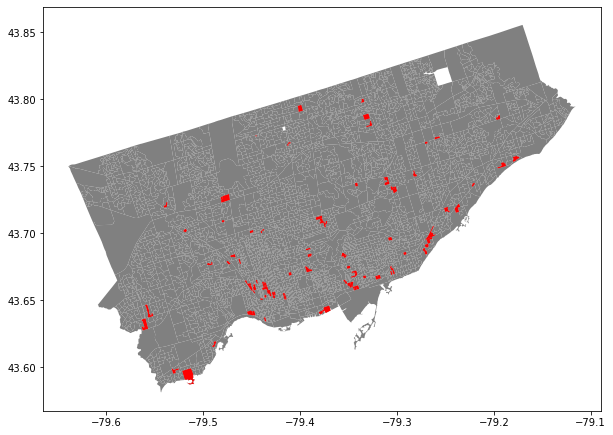

In [225]:
fig, ax = plt.subplots(figsize=(10,10))
carless_1100.plot(ax=ax, color='grey')
carless_1100[carless_1100['thres']==1].plot(column='thres', color = 'red', ax=ax)

In [226]:
len(carless_1100[carless_1100['thres'] == True]['DAUID'].unique())

90

In [227]:
np.nansum(carless_1100[carless_1100['thres'] == True]['pop_carless'].unique())

16167.631320150425

In [228]:
carless_1100[carless_1100['thres'] == True]['diff'].describe()

count    90.000000
mean      2.144444
std       1.176178
min       1.000000
25%       1.000000
50%       2.000000
75%       3.000000
max       6.000000
Name: diff, dtype: float64

In [188]:
low_income_cutoff = pd.read_csv('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/low_income_cutoff/LICODataDALevel.csv')

In [229]:
carless_1100[carless_1100['thres']==True].merge(low_income_cutoff, left_on='GeoUID_y', right_on='COL0').drop_duplicates('DAUID')['COL7'].sum()

10575.0

### Threshold 30 Minutes

In [485]:
carless_1100['2019_u20'] = carless_1100['tt_2019'] < 30
carless_1100['2020_o20'] = carless_1100['tt_2020'] >= 30

In [486]:
carless_1100['thres'] = (carless_1100['2019_u20'] == True) & (carless_1100['2020_o20'] == True)

In [487]:
carless_1100['thres'].value_counts()

False    3549
True      150
Name: thres, dtype: int64

In [488]:
carless_1100 = gpd.GeoDataFrame(carless_1100, geometry='geometry_y')

/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


<AxesSubplot:>

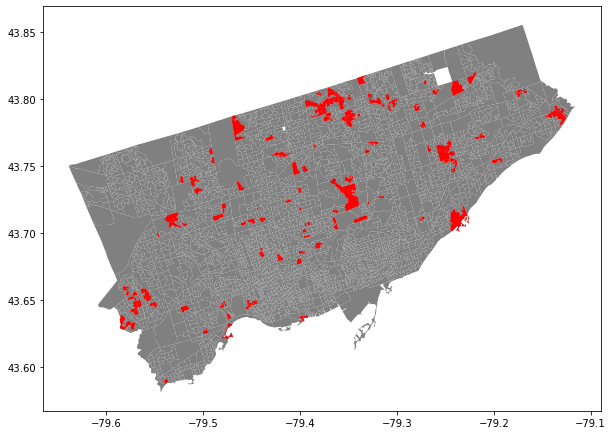

In [489]:
fig, ax = plt.subplots(figsize=(10,10))
carless_1100.plot(ax=ax, color='grey')
carless_1100[carless_1100['thres']==1].plot(column='thres', color = 'red', ax=ax)

In [490]:
len(carless_1100[carless_1100['thres'] == True]['DAUID'].unique())

150

In [491]:
np.nansum(carless_1100[carless_1100['thres'] == True]['pop_carless'].unique())

16671.87610015616

In [492]:
carless_1100[carless_1100['thres'] == True]['diff'].describe()

count    150.000000
mean       2.900000
std        1.756102
min        1.000000
25%        1.000000
50%        3.000000
75%        4.000000
max        8.000000
Name: diff, dtype: float64

In [493]:
low_income_cutoff = pd.read_csv('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/low_income_cutoff/LICODataDALevel.csv')


In [494]:
carless_1100[carless_1100['thres']==True].merge(low_income_cutoff, left_on='GeoUID_y', right_on='COL0').drop_duplicates('DAUID')['COL7'].sum()

13050.0

### Increase by 10 Mins

In [495]:
carless_1100['thres'] = carless_1100['diff'] >= 10

In [496]:
carless_1100['thres'].value_counts()

False    3697
True        2
Name: thres, dtype: int64

In [497]:
carless_1100 = gpd.GeoDataFrame(carless_1100, geometry='geometry_y')

/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


<AxesSubplot:>

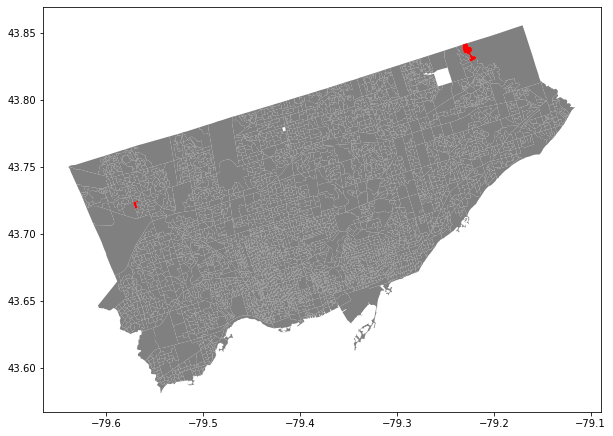

In [498]:
fig, ax = plt.subplots(figsize=(10,10))
carless_1100.plot(ax=ax, color='grey')
carless_1100[carless_1100['thres']==1].plot(column='thres', color = 'red', ax=ax)

In [499]:
thres_carless = carless_1100[carless_1100['thres']==1]

### Number of carless who now have >=10 min increase in travel time if taking public transport

In [500]:
low_income_cutoff[low_income_cutoff['COL0'] == 35204878]

COL0  COL1     COL2  COL3     COL4  COL5  COL6  COL7  COL8
8996  35204878    35  Ontario    20  Toronto  4878   NaN   NaN   NaN

In [501]:
thres_carless.drop_duplicates('DAUID')['pop_carless'].sum()

36.03765861645517

### Number of low income who now have >=10 min increase in travel time if taking public transport

In [254]:
low_income_cutoff = pd.read_csv('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/low_income_cutoff/LICODataDALevel.csv')
thres_carless[thres_carless['thres']==True].merge(low_income_cutoff, left_on='GeoUID_y', right_on='COL0').drop_duplicates('DAUID')['COL7'].sum()

0.0

### Increase by 15 Mins NONE

In [207]:
carless_0800['thres'] = carless_0800['diff'] >= 15

In [208]:
carless_0800['thres'].value_counts()

False    3699
Name: thres, dtype: int64

In [54]:
carless = gpd.GeoDataFrame(carless, geometry='geometry_y')

In [55]:
fig, ax = plt.subplots(figsize=(10,10))
carless.plot(ax=ax, color='grey')
carless[carless['thres']==1].plot(column='thres', color = 'red', ax=ax)

/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(
/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


<AxesSubplot:>

ValueError: cannot convert float NaN to integer

<Figure size 720x720 with 1 Axes>

In [56]:
thres_carless = carless[carless['thres']==1]

### Number of carless who now have >=15 min increase in  travel time if taking public transport

In [57]:
np.nansum(thres_carless['pop_carless'].unique())

0.0

### Number of low income who now have >=15 min increase in travel time if taking public transport

In [58]:
low_income_cutoff = pd.read_csv('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/low_income_cutoff/LICODataDALevel.csv')
thres_carless[thres_carless['thres']==True].merge(low_income_cutoff, left_on='GeoUID_y', right_on='COL0').drop_duplicates('DAUID')['COL7'].sum()

0.0

### Increase by 20 Mins NONE

In [59]:
carless['thres'] = carless['diff'] >= 20

In [60]:
carless['thres'].value_counts()

False    14796
Name: thres, dtype: int64

In [61]:
carless = gpd.GeoDataFrame(carless, geometry='geometry_y')

In [62]:
fig, ax = plt.subplots(figsize=(10,10))
carless.plot(ax=ax, color='grey')
carless[carless['thres']==1].plot(column='thres', color = 'red', ax=ax)

/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(
/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


<AxesSubplot:>

ValueError: cannot convert float NaN to integer

<Figure size 720x720 with 1 Axes>

In [63]:
thres_carless = carless[carless['thres']==1]

### Number of carless who now have >=20 min increase in  travel time if taking public transport

In [64]:
np.nansum(thres_carless['pop_carless'].unique())

0.0

### Number of low income who now have >=20 min increase in travel time if taking public transport

In [65]:
low_income_delays.drop_duplicates('COL0')['COL7'].sum()

NameError: name 'low_income_delays' is not defined

## 1500 Weekday

In [216]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data_dir = '/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/'

In [217]:
LICOdata = pd.read_csv(data_dir + 'LICODATADALevel.csv')

In [218]:
toronto_das = LICOdata[LICOdata['COL4'] == 'Toronto']

In [219]:
carless = gpd.read_file('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/GTAWithVarsForMaps/GTAWithVarsForMaps.shp')
employ = pd.read_csv(data_dir + 'DA employment counts/DA_EMP_2016.csv')
travel_diff = gpd.read_file(data_dir + 'results/travel_time_diff/travel_time_diff_2.shp')
clinics_gdf = gpd.read_file('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/clinic_shp/clean_clinics_v3.shp')
low_income_cutoff = pd.read_csv('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/low_income_cutoff/LICODataDALevel.csv')
DA_income = pd.read_csv(data_dir + 'census_data/DA_income.csv')

In [220]:
carless['DAUID'] = carless['DAUID'].astype(int)

In [221]:
carless = carless[carless['DAUID'].isin(toronto_das['COL0'])]

In [222]:
carless = carless.merge(DA_income, left_on='DAUID', right_on='GeoUID')

In [223]:
carless['PCTCarless'] = carless['PCTCarless'] * 0.01

In [224]:
carless['pop_carless'] = carless['PCTCarless'] * carless['Population']

In [225]:
carless = carless.merge(travel_diff, left_on='DAUID', right_on='fromId')

In [226]:
carless.drop_duplicates('DAUID')['pop_carless'].sum()

657335.5682258331

In [227]:
carless['time'].unique()

array(['0800', '1100', '1500', '0900_sat'], dtype=object)

### Threshold 20 Minutes

In [228]:
carless_1500 = carless[carless['time'] == '1500']

In [230]:
carless_1500['diff'].max()

13

In [181]:
NIA = gpd.read_file('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/neighbourhood-improvement-areas-wgs84/NEIGHBOURHOOD_IMPROVEMENT_AREA_WGS84.shp')
NIA.to_crs(epsg='3857', inplace=True)

geo_1500 = gpd.GeoDataFrame(carless_1500, geometry='geometry_y')
geo_1500.set_crs(epsg='4326', inplace=True)
geo_1500.to_crs(epsg='3857', inplace=True)

merged = gpd.sjoin(geo_1500, NIA)
geo_1500 = geo_1500.merge(merged, on='DAUID', how='left')
final = geo_1500[['DAUID', 'diff_x', 'AREA_NAME']].sort_values(by='diff_x', ascending=False).reset_index().drop('index', axis=1)[0:20]

final.rename(columns={'DAUID': 'DA ID', 'diff_x': 'Travel Delay (mins)', 'AREA_NAME': 'NIA Name (if exists)'})

DA ID  Travel Delay (mins)              NIA Name (if exists)
0   35204712                   13                               NaN
1   35201830                   10                               NaN
2   35201832                    9                               NaN
3   35201849                    9                               NaN
4   35201842                    9                               NaN
5   35201839                    9                               NaN
6   35201833                    9                               NaN
7   35204711                    9                               NaN
8   35201850                    8                               NaN
9   35201838                    8              Elms-Old Rexdale (5)
10  35203720                    8                               NaN
11  35201831                    8                               NaN
12  35203719                    8                               NaN
13  35201840                    7                               NaN
14  35201846                    7              Elms-Old Rexdale (5)
15  35204379                    7              Elms-Old Rexdale (5)
16  35204379                    7  Thistletown-Beaumond Heights (3)
17  35201828                    7              Elms-Old Rexdale (5)
18  35201846                    7  Thistletown-Beaumond Heights (3)
19  35204376                    7  Thistletown-Beaumond Heights (3)

In [32]:
carless_1500['2019_u20'] = carless_1500['tt_2019'] < 20
carless_1500['2020_o20'] = carless_1500['tt_2020'] >= 20

<ipython-input-32-ce36ed2c8fcc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  carless_1500['2019_u20'] = carless_1500['tt_2019'] < 20
<ipython-input-32-ce36ed2c8fcc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  carless_1500['2020_o20'] = carless_1500['tt_2020'] >= 20


In [33]:
carless_1500['thres'] = (carless_1500['2019_u20'] == True) & (carless_1500['2020_o20'] == True)

<ipython-input-33-7fb34e8bd405>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  carless_1500['thres'] = (carless_1500['2019_u20'] == True) & (carless_1500['2020_o20'] == True)


In [34]:
carless_1500 = gpd.GeoDataFrame(carless_1500, geometry='geometry_y')

/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


<AxesSubplot:>

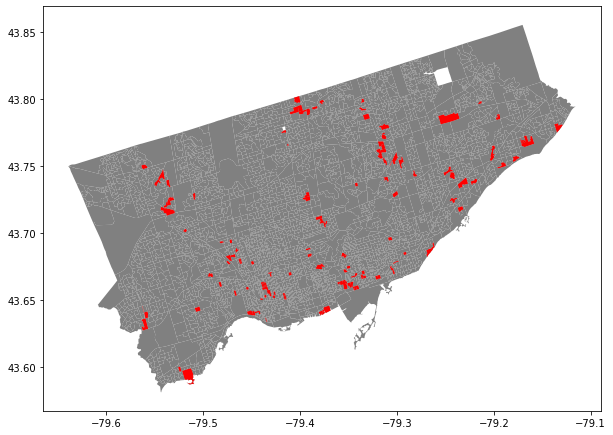

In [35]:
fig, ax = plt.subplots(figsize=(10,10))
carless_1500.plot(ax=ax, color='grey')
carless_1500[carless_1500['thres']==1].plot(column='thres', color = 'red', ax=ax)

In [36]:
len(carless_1500[carless_1500['thres'] == True]['DAUID'].unique())

126

In [37]:
np.nansum(carless_1500[carless_1500['thres'] == True]['pop_carless'].unique())

23380.78254625966

In [38]:
carless_1500[carless_1500['thres'] == True]['diff'].describe()

count    126.000000
mean       2.309524
std        1.433677
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        7.000000
Name: diff, dtype: float64

In [39]:
low_income_cutoff = pd.read_csv('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/low_income_cutoff/LICODataDALevel.csv')

In [40]:
carless_1500[carless_1500['thres']==True].merge(low_income_cutoff, left_on='GeoUID_y', right_on='COL0').drop_duplicates('DAUID')['COL7'].sum()

15205.0

### Threshold 30 Minutes

In [41]:
carless_1500['2019_u20'] = carless_1500['tt_2019'] < 30
carless_1500['2020_o20'] = carless_1500['tt_2020'] >= 30

In [42]:
carless_1500['thres'] = (carless_1500['2019_u20'] == True) & (carless_1500['2020_o20'] == True)

In [43]:
carless_1500['thres'].value_counts()

False    3549
True      150
Name: thres, dtype: int64

In [44]:
carless_1500 = gpd.GeoDataFrame(carless_1500, geometry='geometry_y')

/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


<AxesSubplot:>

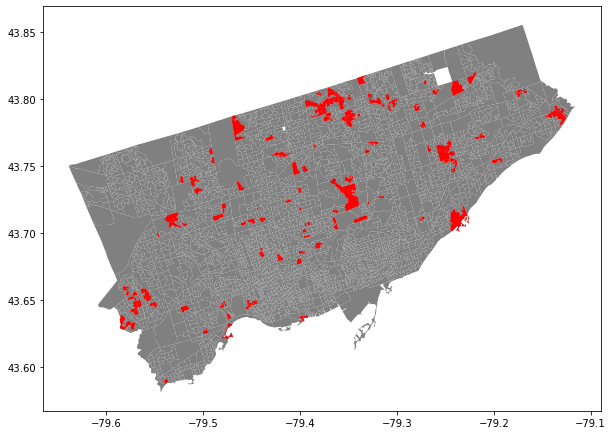

In [45]:
fig, ax = plt.subplots(figsize=(10,10))
carless_1500.plot(ax=ax, color='grey')
carless_1500[carless_1500['thres']==1].plot(column='thres', color = 'red', ax=ax)

In [46]:
len(carless_1500[carless_1500['thres'] == True]['DAUID'].unique())

150

In [47]:
np.nansum(carless_1500[carless_1500['thres'] == True]['pop_carless'].unique())

16671.87610015616

In [48]:
carless_1500[carless_1500['thres'] == True]['diff'].describe()

count    150.000000
mean       2.900000
std        1.756102
min        1.000000
25%        1.000000
50%        3.000000
75%        4.000000
max        8.000000
Name: diff, dtype: float64

In [49]:
low_income_cutoff = pd.read_csv('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/low_income_cutoff/LICODataDALevel.csv')


In [50]:
carless_1500[carless_1500['thres']==True].merge(low_income_cutoff, left_on='GeoUID_y', right_on='COL0').drop_duplicates('DAUID')['COL7'].sum()

13050.0

### Increase by 10 Mins

In [51]:
carless_1500['thres'] = carless_1500['diff'] >= 10

In [52]:
carless_1500['thres'].value_counts()

False    3697
True        2
Name: thres, dtype: int64

In [53]:
carless_1500 = gpd.GeoDataFrame(carless_1500, geometry='geometry_y')

/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


<AxesSubplot:>

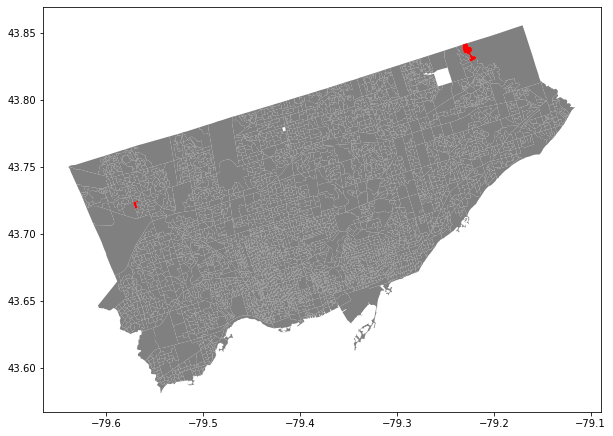

In [54]:
fig, ax = plt.subplots(figsize=(10,10))
carless_1500.plot(ax=ax, color='grey')
carless_1500[carless_1500['thres']==1].plot(column='thres', color = 'red', ax=ax)

In [55]:
thres_carless = carless_1500[carless_1500['thres']==1]

### Number of carless who now have >=10 min increase in travel time if taking public transport

In [56]:
thres_carless.drop_duplicates('DAUID')['pop_carless'].sum()

36.03765861645517

### Number of low income who now have >=10 min increase in travel time if taking public transport

In [57]:
low_income_cutoff = pd.read_csv('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/low_income_cutoff/LICODataDALevel.csv')
thres_carless[thres_carless['thres']==True].merge(low_income_cutoff, left_on='GeoUID_y', right_on='COL0').drop_duplicates('DAUID')['COL7'].sum()

140.0

### Increase by 15 Mins NONE

In [311]:
carless_1500['thres'] = carless_1500['diff'] >= 15

In [312]:
carless_1500['thres'].value_counts()

False    3699
Name: thres, dtype: int64

In [54]:
carless = gpd.GeoDataFrame(carless, geometry='geometry_y')

In [55]:
fig, ax = plt.subplots(figsize=(10,10))
carless.plot(ax=ax, color='grey')
carless[carless['thres']==1].plot(column='thres', color = 'red', ax=ax)

/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(
/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


<AxesSubplot:>

ValueError: cannot convert float NaN to integer

<Figure size 720x720 with 1 Axes>

In [56]:
thres_carless = carless[carless['thres']==1]

### Number of carless who now have >=15 min increase in  travel time if taking public transport

In [57]:
np.nansum(thres_carless['pop_carless'].unique())

0.0

### Number of low income who now have >=15 min increase in travel time if taking public transport

In [58]:
low_income_cutoff = pd.read_csv('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/low_income_cutoff/LICODataDALevel.csv')
thres_carless[thres_carless['thres']==True].merge(low_income_cutoff, left_on='GeoUID_y', right_on='COL0').drop_duplicates('DAUID')['COL7'].sum()

0.0

### Increase by 20 Mins NONE

In [59]:
carless['thres'] = carless['diff'] >= 20

In [60]:
carless['thres'].value_counts()

False    14796
Name: thres, dtype: int64

In [61]:
carless = gpd.GeoDataFrame(carless, geometry='geometry_y')

In [62]:
fig, ax = plt.subplots(figsize=(10,10))
carless.plot(ax=ax, color='grey')
carless[carless['thres']==1].plot(column='thres', color = 'red', ax=ax)

/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(
/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


<AxesSubplot:>

ValueError: cannot convert float NaN to integer

<Figure size 720x720 with 1 Axes>

In [63]:
thres_carless = carless[carless['thres']==1]

### Number of carless who now have >=20 min increase in  travel time if taking public transport

In [64]:
np.nansum(thres_carless['pop_carless'].unique())

0.0

### Number of low income who now have >=20 min increase in travel time if taking public transport

In [65]:
low_income_delays.drop_duplicates('COL0')['COL7'].sum()

NameError: name 'low_income_delays' is not defined

## 0900 Saturday

In [182]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data_dir = '/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/'

In [183]:
LICOdata = pd.read_csv(data_dir + 'LICODATADALevel.csv')

In [184]:
toronto_das = LICOdata[LICOdata['COL4'] == 'Toronto']

In [185]:
carless = gpd.read_file('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/GTAWithVarsForMaps/GTAWithVarsForMaps.shp')
employ = pd.read_csv(data_dir + 'DA employment counts/DA_EMP_2016.csv')
travel_diff = gpd.read_file(data_dir + 'results/travel_time_diff/travel_time_diff_2.shp')
clinics_gdf = gpd.read_file('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/clinic_shp/clean_clinics_v3.shp')
low_income_cutoff = pd.read_csv('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/low_income_cutoff/LICODataDALevel.csv')
DA_income = pd.read_csv(data_dir + 'census_data/DA_income.csv')

In [186]:
carless['DAUID'] = carless['DAUID'].astype(int)

In [187]:
carless = carless[carless['DAUID'].isin(toronto_das['COL0'])]

In [188]:
carless = carless.merge(DA_income, left_on='DAUID', right_on='GeoUID')

In [189]:
carless['PCTCarless'] = carless['PCTCarless'] * 0.01

In [190]:
carless['pop_carless'] = carless['PCTCarless'] * carless['Population']

In [191]:
carless = carless.merge(travel_diff, left_on='DAUID', right_on='fromId')

In [192]:
carless.drop_duplicates('DAUID')['pop_carless'].sum()

657335.5682258331

In [193]:
carless['time'].unique()

array(['0800', '1100', '1500', '0900_sat'], dtype=object)

### Threshold 20 Minutes

In [194]:
carless_0900_sat = carless[carless['time'] == '0900_sat']

In [195]:
NIA = gpd.read_file('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/neighbourhood-improvement-areas-wgs84/NEIGHBOURHOOD_IMPROVEMENT_AREA_WGS84.shp')
NIA.to_crs(epsg='3857', inplace=True)

geo_0900 = gpd.GeoDataFrame(carless_0900_sat, geometry='geometry_y')
geo_0900.set_crs(epsg='4326', inplace=True)
geo_0900.to_crs(epsg='3857', inplace=True)

merged = gpd.sjoin(geo_0900, NIA)
geo_0900 = geo_0900.merge(merged, on='DAUID', how='left')
final = geo_0900[['DAUID', 'diff_x', 'AREA_NAME']].sort_values(by='diff_x', ascending=False).reset_index().drop('index', axis=1)[0:20]

final.rename(columns={'DAUID': 'DA ID', 'diff_x': 'Travel Delay (mins)', 'AREA_NAME': 'NIA Name (if exists)'})

DA ID  Travel Delay (mins) NIA Name (if exists)
0   35200397                    7                  NaN
1   35201006                    7                  NaN
2   35200675                    7                  NaN
3   35203227                    7                  NaN
4   35201005                    7                  NaN
5   35203148                    6                  NaN
6   35203156                    6                  NaN
7   35204750                    6                  NaN
8   35201007                    6                  NaN
9   35203217                    6                  NaN
10  35201004                    5                  NaN
11  35203618                    5                  NaN
12  35202771                    5                  NaN
13  35202776                    5                  NaN
14  35203841                    5                  NaN
15  35202772                    5                  NaN
16  35200687                    5                  NaN
17  35204678                    5                  NaN
18  35204680                    5                  NaN
19  35203226                    5                  NaN

In [580]:
carless_0900_sat['2019_u20'] = carless_0900_sat['tt_2019'] < 20
carless_0900_sat['2020_o20'] = carless_0900_sat['tt_2020'] >= 20

<ipython-input-580-25c0fa624bb0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  carless_0900_sat['2019_u20'] = carless_0900_sat['tt_2019'] < 20
<ipython-input-580-25c0fa624bb0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  carless_0900_sat['2020_o20'] = carless_0900_sat['tt_2020'] >= 20


In [581]:
carless_0900_sat['thres'] = (carless_0900_sat['2019_u20'] == True) & (carless_0900_sat['2020_o20'] == True)

<ipython-input-581-508118c3b40b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  carless_0900_sat['thres'] = (carless_0900_sat['2019_u20'] == True) & (carless_0900_sat['2020_o20'] == True)


In [582]:
carless_0900_sat = gpd.GeoDataFrame(carless_0900_sat, geometry='geometry_y')

/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


<AxesSubplot:>

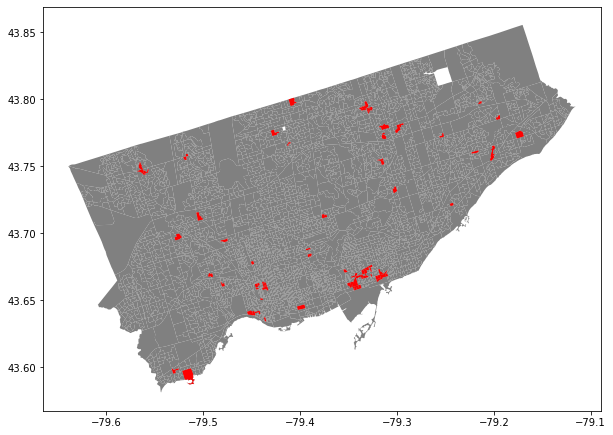

In [330]:
fig, ax = plt.subplots(figsize=(10,10))
carless_0900_sat.plot(ax=ax, color='grey')
carless_0900_sat[carless_0900_sat['thres']==1].plot(column='thres', color = 'red', ax=ax)

In [583]:
len(carless_0900_sat[carless_0900_sat['thres'] == True]['DAUID'].unique())

79

In [584]:
np.nansum(carless_0900_sat[carless_0900_sat['thres'] == True]['pop_carless'].unique())

16793.863226346297

In [585]:
carless_0900_sat[carless_0900_sat['thres'] == True]['diff'].describe()

count    79.000000
mean      2.405063
std       1.589380
min       1.000000
25%       1.000000
50%       2.000000
75%       3.000000
max       7.000000
Name: diff, dtype: float64

In [586]:
low_income_cutoff = pd.read_csv('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/low_income_cutoff/LICODataDALevel.csv')

In [587]:
carless_0900_sat[carless_0900_sat['thres']==True].merge(low_income_cutoff, left_on='GeoUID_y', right_on='COL0').drop_duplicates('DAUID')['COL7'].sum()

10880.0

### Threshold 30 Minutes

In [588]:
carless_0900_sat['2019_u20'] = carless_0900_sat['tt_2019'] < 30
carless_0900_sat['2020_o20'] = carless_0900_sat['tt_2020'] >= 30

In [589]:
carless_0900_sat['thres'] = (carless_0900_sat['2019_u20'] == True) & (carless_0900_sat['2020_o20'] == True)

In [590]:
carless_0900_sat['thres'].value_counts()

False    3598
True      101
Name: thres, dtype: int64

In [591]:
carless_0900_sat = gpd.GeoDataFrame(carless_0900_sat, geometry='geometry_y')

/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


<AxesSubplot:>

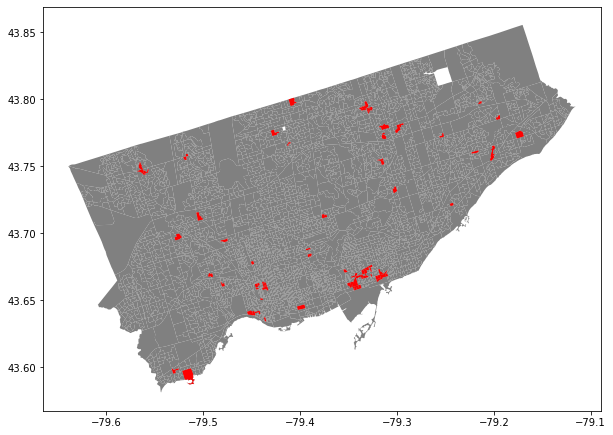

In [339]:
fig, ax = plt.subplots(figsize=(10,10))
carless_0900_sat.plot(ax=ax, color='grey')
carless_0900_sat[carless_0900_sat['thres']==1].plot(column='thres', color = 'red', ax=ax)

In [592]:
len(carless_0900_sat[carless_0900_sat['thres'] == True]['DAUID'].unique())

101

In [593]:
np.nansum(carless_0900_sat[carless_0900_sat['thres'] == True]['pop_carless'].unique())

13260.309395943092

In [594]:
carless_0900_sat[carless_0900_sat['thres'] == True]['diff'].describe()

count    101.000000
mean       2.326733
std        1.312318
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        6.000000
Name: diff, dtype: float64

In [595]:
low_income_cutoff = pd.read_csv('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/low_income_cutoff/LICODataDALevel.csv')


In [596]:
carless_0900_sat[carless_0900_sat['thres']==True].merge(low_income_cutoff, left_on='GeoUID_y', right_on='COL0').drop_duplicates('DAUID')['COL7'].sum()

10525.0

### Increase by 10 Mins NONE

In [345]:
carless_0900_sat['thres'] = carless_0900_sat['diff'] >= 10

In [346]:
carless_0900_sat['thres'].value_counts()

False    3699
Name: thres, dtype: int64

In [242]:
carless_1100 = gpd.GeoDataFrame(carless_1100, geometry='geometry_y')

/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


<AxesSubplot:>

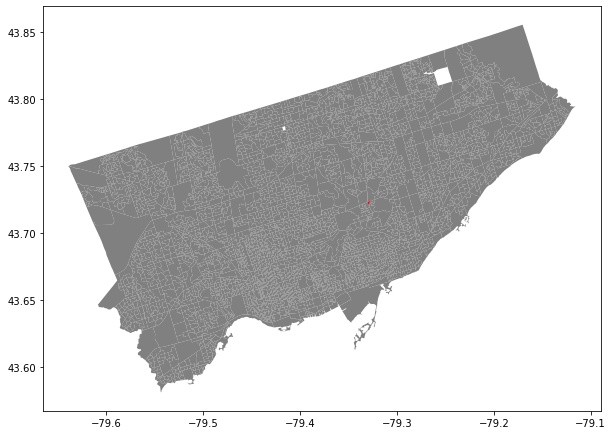

In [243]:
fig, ax = plt.subplots(figsize=(10,10))
carless_1100.plot(ax=ax, color='grey')
carless_1100[carless_1100['thres']==1].plot(column='thres', color = 'red', ax=ax)

In [248]:
thres_carless = carless_1100[carless_1100['thres']==1]

### Number of carless who now have >=10 min increase in travel time if taking public transport

In [253]:
low_income_cutoff[low_income_cutoff['COL0'] == 35204878]

COL0  COL1     COL2  COL3     COL4  COL5  COL6  COL7  COL8
8996  35204878    35  Ontario    20  Toronto  4878   NaN   NaN   NaN

In [249]:
thres_carless.drop_duplicates('DAUID')['pop_carless'].sum()

0.0

### Number of low income who now have >=10 min increase in travel time if taking public transport

In [254]:
low_income_cutoff = pd.read_csv('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/low_income_cutoff/LICODataDALevel.csv')
thres_carless[thres_carless['thres']==True].merge(low_income_cutoff, left_on='GeoUID_y', right_on='COL0').drop_duplicates('DAUID')['COL7'].sum()

0.0

### Increase by 15 Mins NONE

In [207]:
carless_0800['thres'] = carless_0800['diff'] >= 15

In [208]:
carless_0800['thres'].value_counts()

False    3699
Name: thres, dtype: int64

In [54]:
carless = gpd.GeoDataFrame(carless, geometry='geometry_y')

In [55]:
fig, ax = plt.subplots(figsize=(10,10))
carless.plot(ax=ax, color='grey')
carless[carless['thres']==1].plot(column='thres', color = 'red', ax=ax)

/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(
/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


<AxesSubplot:>

ValueError: cannot convert float NaN to integer

<Figure size 720x720 with 1 Axes>

In [56]:
thres_carless = carless[carless['thres']==1]

### Number of carless who now have >=15 min increase in  travel time if taking public transport

In [57]:
np.nansum(thres_carless['pop_carless'].unique())

0.0

### Number of low income who now have >=15 min increase in travel time if taking public transport

In [58]:
low_income_cutoff = pd.read_csv('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/low_income_cutoff/LICODataDALevel.csv')
thres_carless[thres_carless['thres']==True].merge(low_income_cutoff, left_on='GeoUID_y', right_on='COL0').drop_duplicates('DAUID')['COL7'].sum()

0.0

### Increase by 20 Mins NONE

In [59]:
carless['thres'] = carless['diff'] >= 20

In [60]:
carless['thres'].value_counts()

False    14796
Name: thres, dtype: int64

In [61]:
carless = gpd.GeoDataFrame(carless, geometry='geometry_y')

In [62]:
fig, ax = plt.subplots(figsize=(10,10))
carless.plot(ax=ax, color='grey')
carless[carless['thres']==1].plot(column='thres', color = 'red', ax=ax)

/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(
/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


<AxesSubplot:>

ValueError: cannot convert float NaN to integer

<Figure size 720x720 with 1 Axes>

In [63]:
thres_carless = carless[carless['thres']==1]

### Number of carless who now have >=20 min increase in  travel time if taking public transport

In [64]:
np.nansum(thres_carless['pop_carless'].unique())

0.0

### Number of low income who now have >=20 min increase in travel time if taking public transport

In [65]:
low_income_delays.drop_duplicates('COL0')['COL7'].sum()

NameError: name 'low_income_delays' is not defined

## Plotting

In [381]:
import contextily as ctx

In [93]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data_dir = '/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/'

In [94]:
LICOdata = pd.read_csv(data_dir + 'LICODATADALevel.csv')

In [95]:
toronto_das = LICOdata[LICOdata['COL4'] == 'Toronto']

In [96]:
carless = gpd.read_file('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/GTAWithVarsForMaps/GTAWithVarsForMaps.shp')
employ = pd.read_csv(data_dir + 'DA employment counts/DA_EMP_2016.csv')
travel_diff = gpd.read_file(data_dir + 'results/travel_time_diff/travel_time_diff_2.shp')
clinics_gdf = gpd.read_file('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/clinic_shp/clean_clinics_v3.shp')
low_income_cutoff = pd.read_csv('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/low_income_cutoff/LICODataDALevel.csv')
DA_income = pd.read_csv(data_dir + 'census_data/DA_income.csv')

In [105]:
NIA = gpd.read_file('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/neighbourhood-improvement-areas-wgs84/NEIGHBOURHOOD_IMPROVEMENT_AREA_WGS84.shp')
NIA.to_crs(epsg='3857', inplace=True)

carless = carless.merge(low_income_cutoff, left_on='DAUID', right_on='COL0')

In [98]:
carless = carless.merge(low_income_cutoff, left_on='DAUID', right_on='COL0')

In [100]:
travel_diff = travel_diff[travel_diff['fromId'].isin(toronto_das['COL0'])]

In [101]:
travel_diff

fromId                                             toId_x  tt_2019  \
1408   35200002  TrueNorth Medical Centre - Scarborough - Markh...       37   
1409   35200003  TrueNorth Medical Centre - Scarborough - Markh...       37   
1410   35200004  TrueNorth Medical Centre - Scarborough - Markh...       35   
1411   35200005  TrueNorth Medical Centre - Scarborough - Markh...       34   
1412   35200006  TrueNorth Medical Centre - Scarborough - Markh...       36   
...         ...                                                ...      ...   
25706  35204902      Women?s College Hospital, 76 Grenville Street        5   
25707  35204903  TrueNorth Medical Centre - Scarborough - Green...       31   
25708  35204904  TrueNorth Medical Centre - Scarborough - Green...       30   
25709  35204905  TrueNorth Medical Centre - Scarborough - Green...       17   
25710  35204906  TrueNorth Medical Centre - Scarborough - Green...       27   

       tt_2020  diff    GeoUID  neg_access      time  weekend  \
1408        37     0  35200002           1      0800        0   
1409        38     1  35200003           1      0800        0   
1410        35     0  35200004           1      0800        0   
1411        33    -1  35200005           0      0800        0   
1412        35    -1  35200006           0      0800        0   
...        ...   ...       ...         ...       ...      ...   
25706        5     0  35204902           1  0900_sat        1   
25707       34     3  35204903           1  0900_sat        1   
25708       32     2  35204904           1  0900_sat        1   
25709       18     1  35204905           1  0900_sat        1   
25710       26    -1  35204906           0  0900_sat        1   

                                                geometry  
1408   POLYGON ((-79.20270 43.82367, -79.20228 43.822...  
1409   POLYGON ((-79.20126 43.82041, -79.20080 43.819...  
1410   POLYGON ((-79.20522 43.81890, -79.20524 43.818...  
1411   POLYGON ((-79.20414 43.81748, -79.20447 43.817...  
1412   POLYGON ((-79.20335 43.81687, -79.20361 43.816...  
...                                                  ...  
25706  POLYGON ((-79.38372 43.66124, -79.38584 43.660...  
25707  POLYGON ((-79.37532 43.76559, -79.37546 43.765...  
25708  POLYGON ((-79.37593 43.76551, -79.37609 43.765...  
25709  POLYGON ((-79.33724 43.76771, -79.33725 43.767...  
25710  POLYGON ((-79.33877 43.77264, -79.33866 43.772...  

[14796 rows x 10 columns]

In [102]:
times = ['0800', '1100', '1500', '0900_sat']
travel_diff_dic = {}
low_income_dic = {}
for time in times:
    print(time)
    travel_diff_dic[time] = gpd.GeoDataFrame(travel_diff[travel_diff['time']==time], geometry='geometry')
    travel_diff_dic[time].to_crs(epsg=3857, inplace=True)
    #low_income_dic[time] = travel_diff_dic[time][(travel_diff_dic[time]['neg_access']==1) & (travel_diff_dic[time]['income_quintile']==0)]

0800
1100
1500
0900_sat


/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


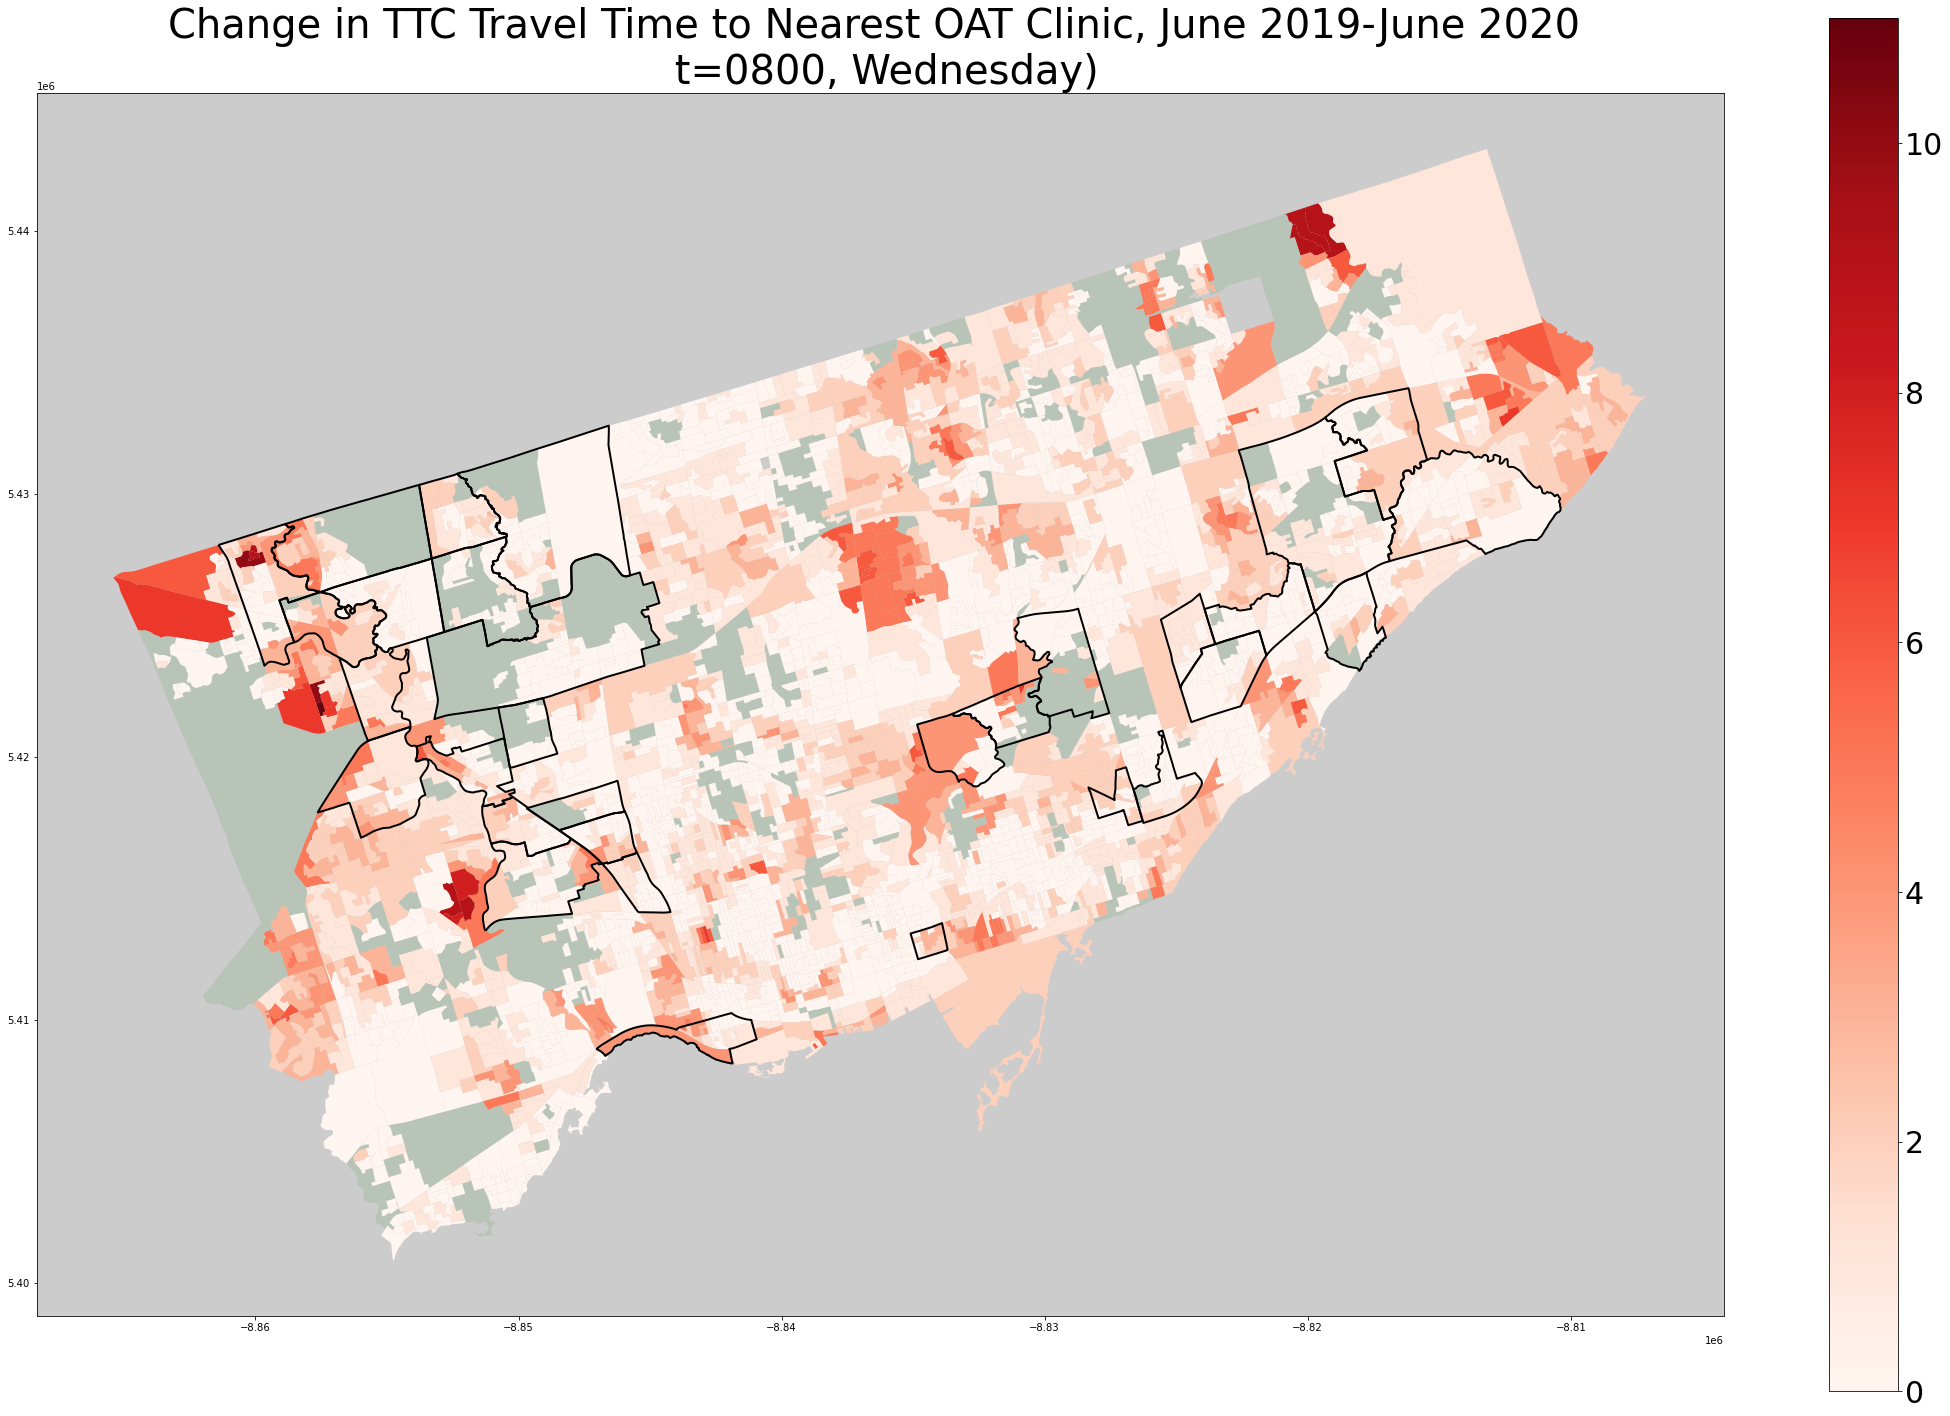

In [107]:
time = '0800'
fig, ax = plt.subplots(figsize=(30, 20))
travel_diff_dic[time][travel_diff_dic[time]['neg_access']==0].plot(column='diff', ax=ax, legend=True, color='green', alpha=0.1)
travel_diff_dic[time][travel_diff_dic[time]['neg_access']==1].plot(column='diff', ax=ax, cmap='Reds', legend=True)
#ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
NIA.plot(facecolor='none', edgecolor='black', linewidth=2, ax=ax)
cb_ax = fig.axes[1]
ax.patch.set_facecolor('black')
ax.patch.set_alpha(0.2)
plt.title(f"Change in TTC Travel Time to Nearest OAT Clinic, June 2019-June 2020 \n t={time}, Wednesday)", fontsize=40)
cb_ax.tick_params(labelsize=30)
plt.tight_layout()
#plt.savefig(f'/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/imgs/{time}.png')

/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


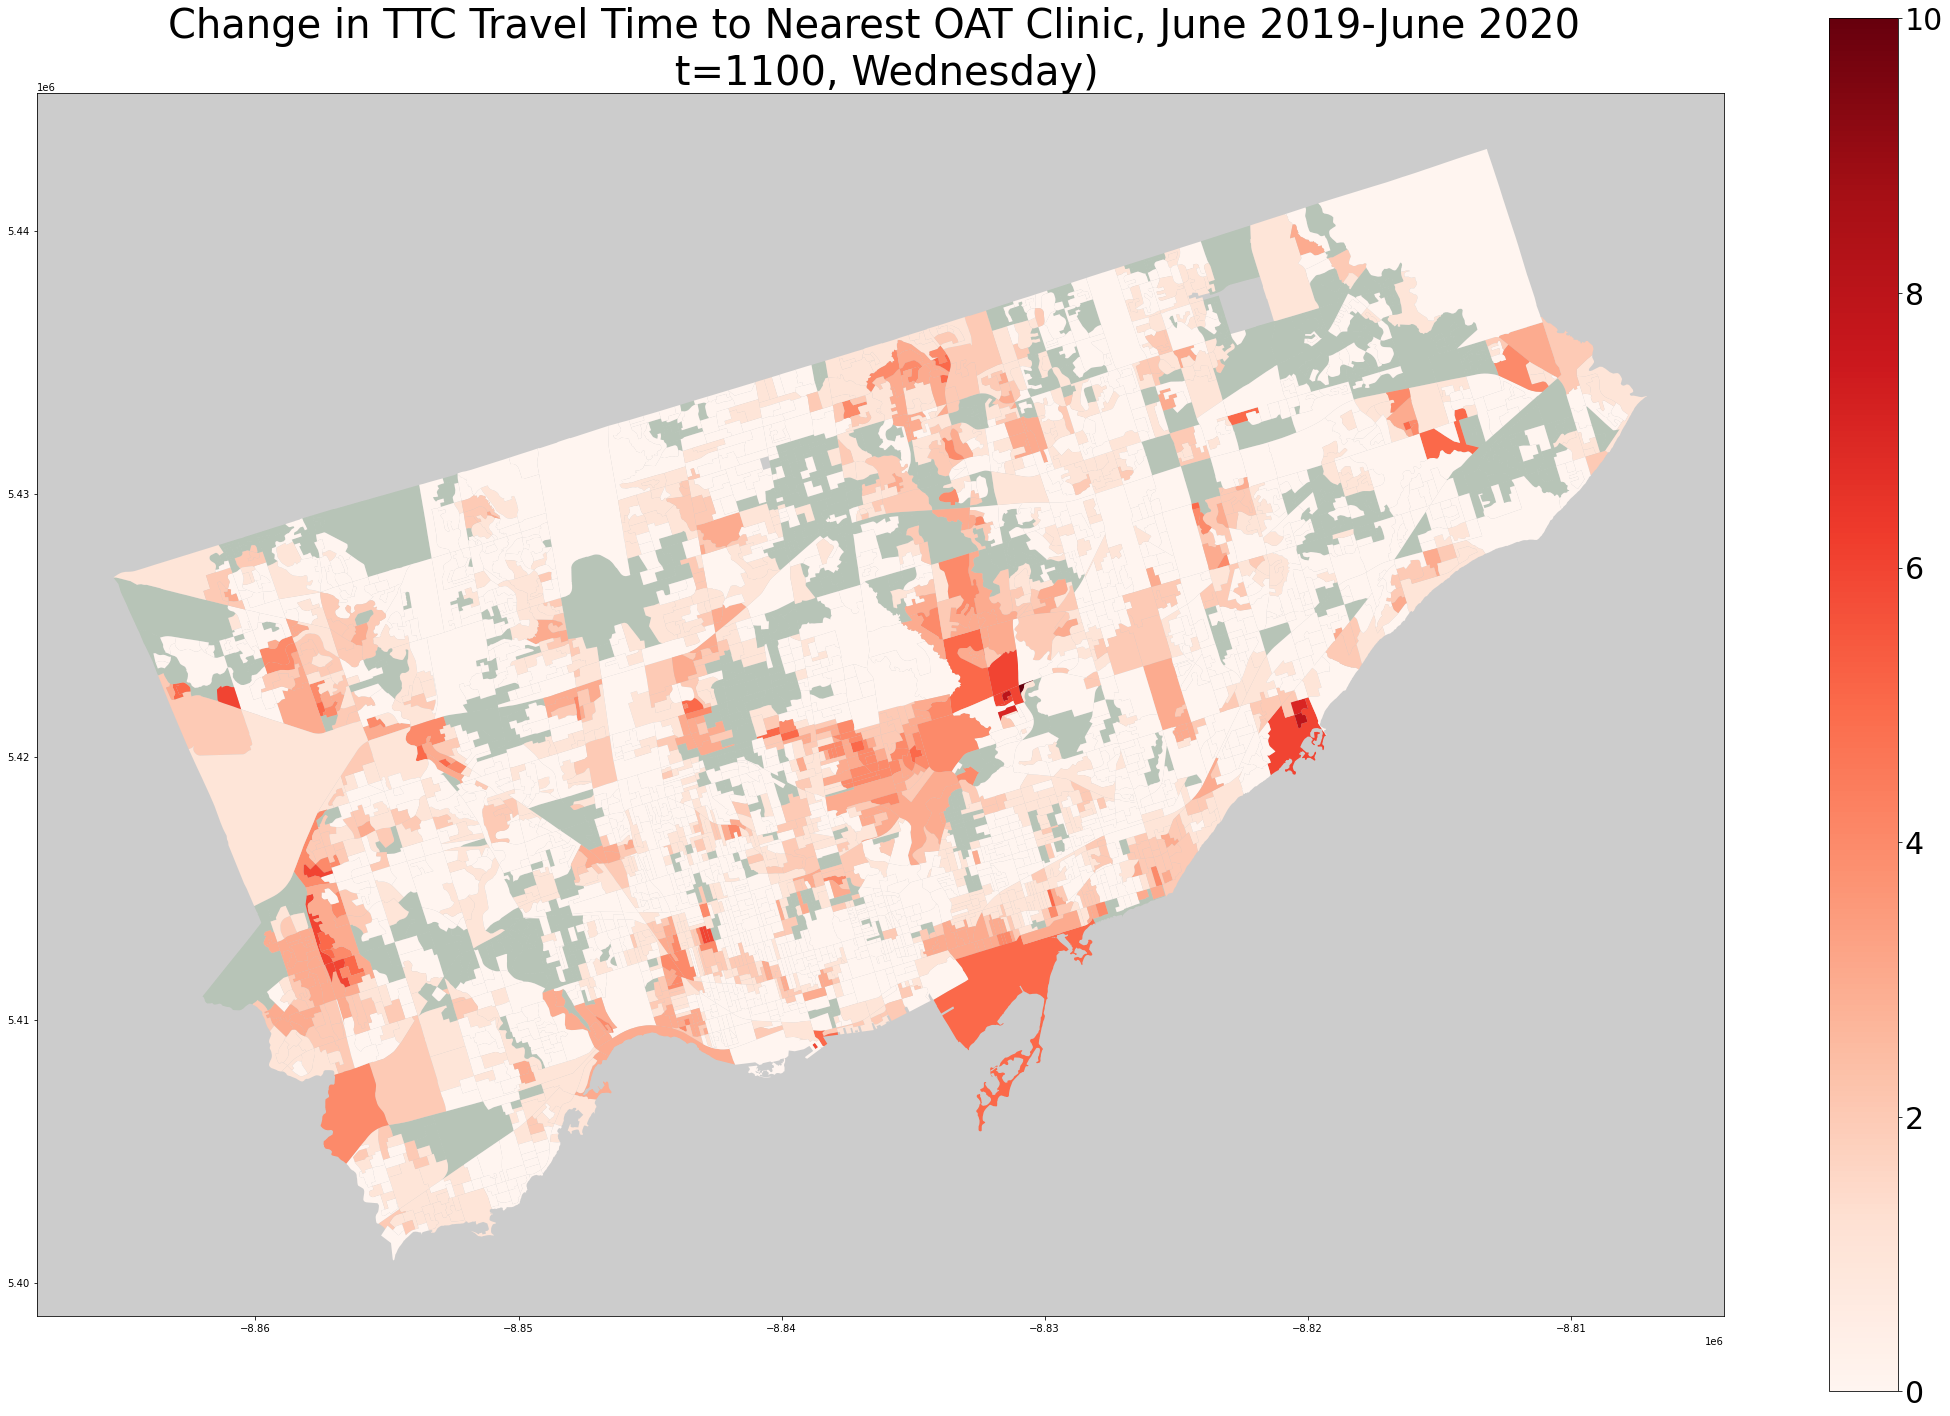

In [386]:
time = '1100'
fig, ax = plt.subplots(figsize=(30, 20))
travel_diff_dic[time][travel_diff_dic[time]['neg_access']==0].plot(column='diff', ax=ax, legend=True, color='green', alpha=0.1)
travel_diff_dic[time][travel_diff_dic[time]['neg_access']==1].plot(column='diff', ax=ax, cmap='Reds', legend=True)
cb_ax = fig.axes[1]
ax.patch.set_facecolor('black')
ax.patch.set_alpha(0.2)
plt.title(f"Change in TTC Travel Time to Nearest OAT Clinic, June 2019-June 2020 \n t={time}, Wednesday)", fontsize=40)
cb_ax.tick_params(labelsize=30)
plt.tight_layout()
#plt.savefig(f'/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/imgs/{time}.png')

/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


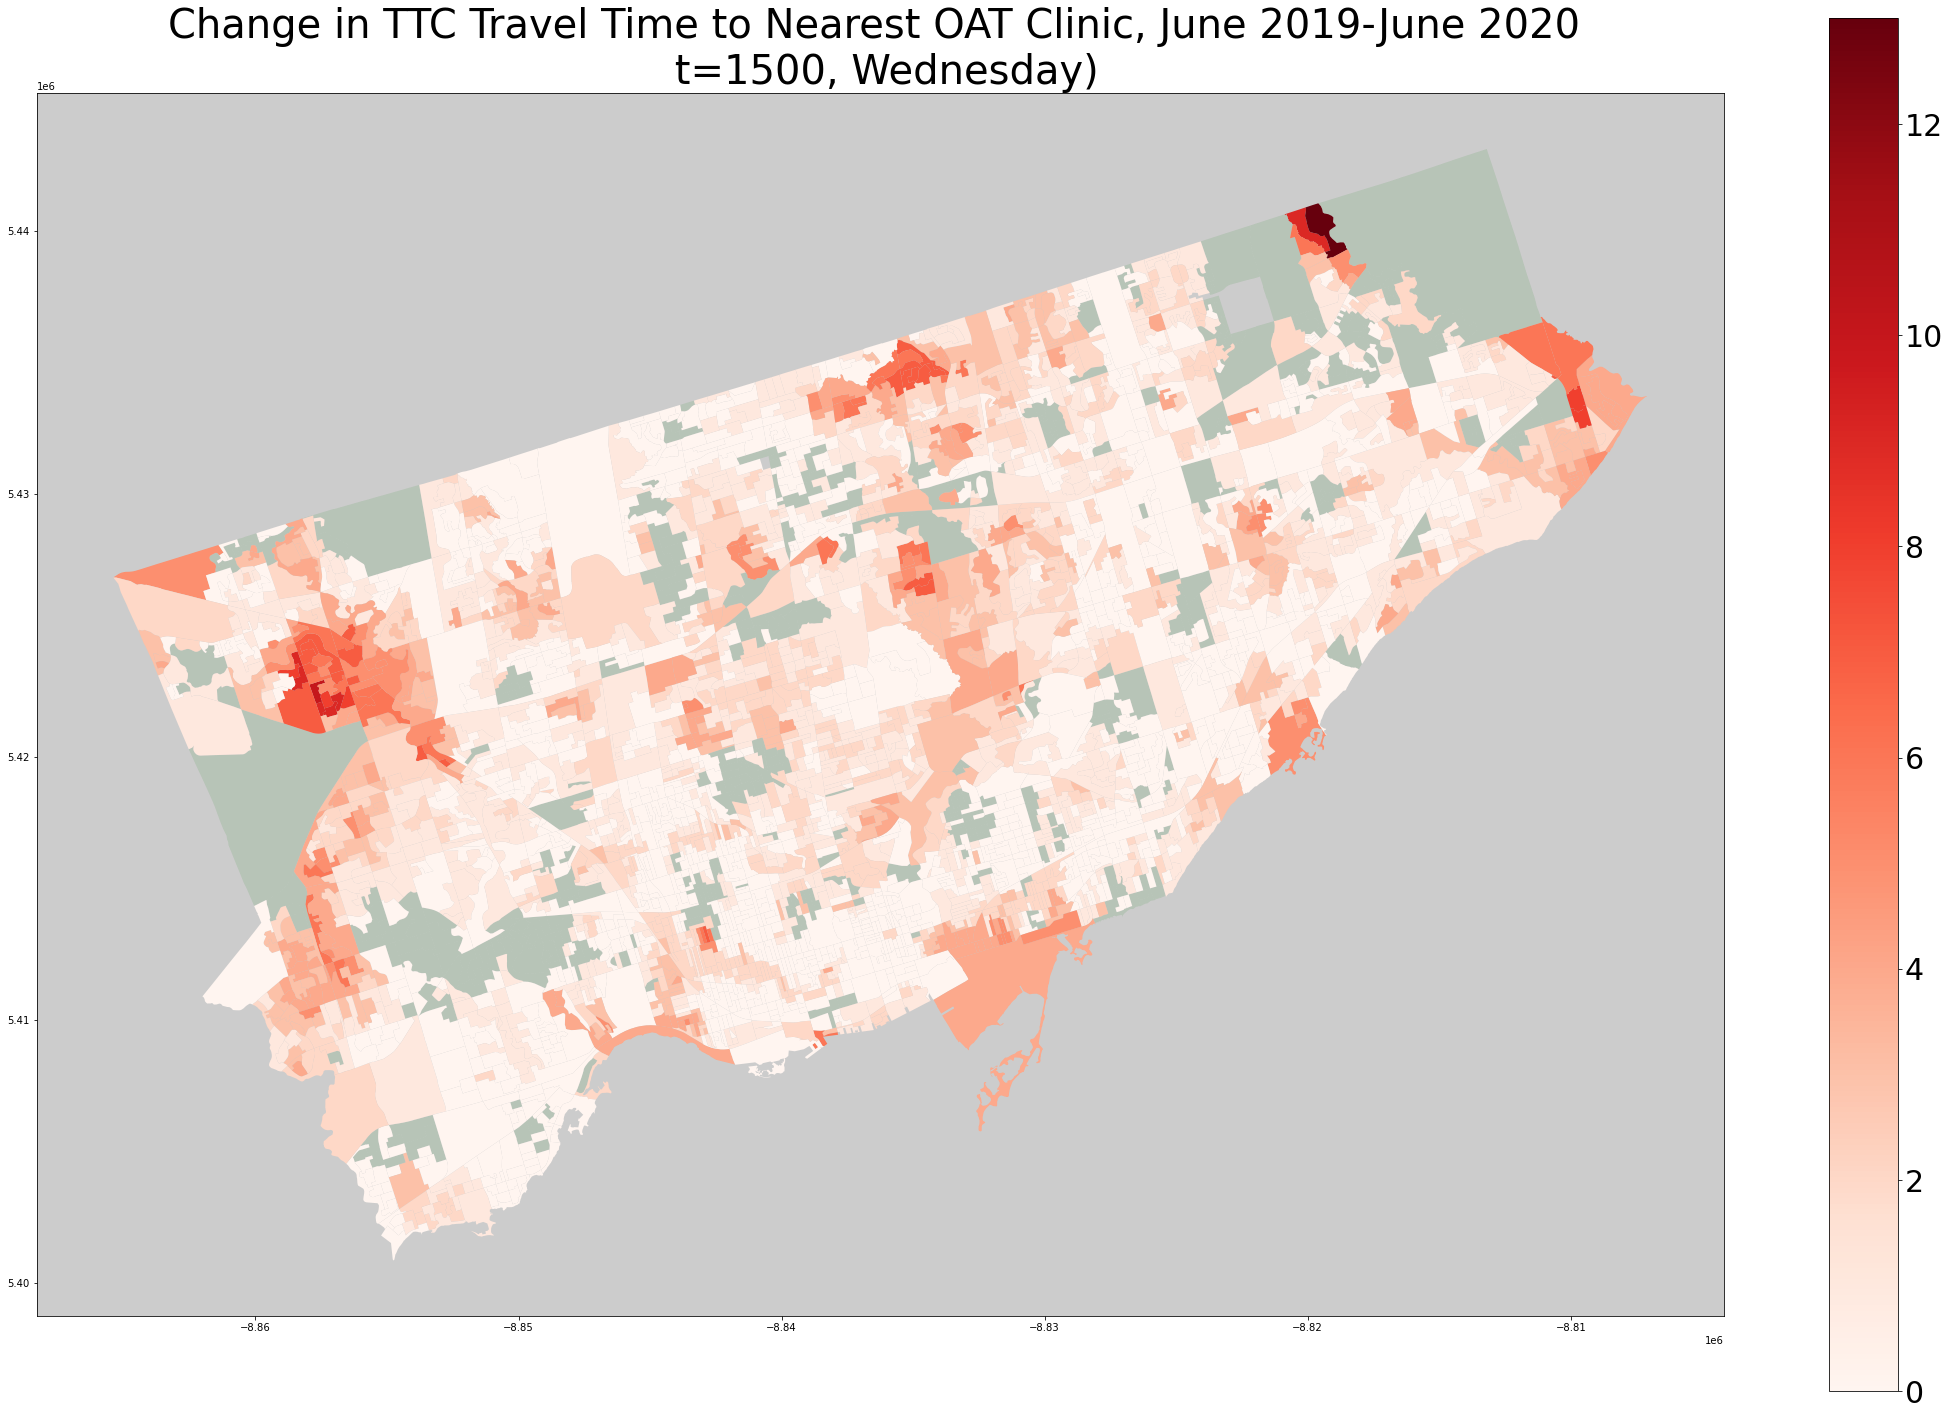

In [387]:
time = '1500'
fig, ax = plt.subplots(figsize=(30, 20))
travel_diff_dic[time][travel_diff_dic[time]['neg_access']==0].plot(column='diff', ax=ax, legend=True, color='green', alpha=0.1)
travel_diff_dic[time][travel_diff_dic[time]['neg_access']==1].plot(column='diff', ax=ax, cmap='Reds', legend=True)
cb_ax = fig.axes[1]
ax.patch.set_facecolor('black')
ax.patch.set_alpha(0.2)
plt.title(f"Change in TTC Travel Time to Nearest OAT Clinic, June 2019-June 2020 \n t={time}, Wednesday)", fontsize=40)
cb_ax.tick_params(labelsize=30)
plt.tight_layout()
#plt.savefig(f'/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/imgs/{time}.png')

/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


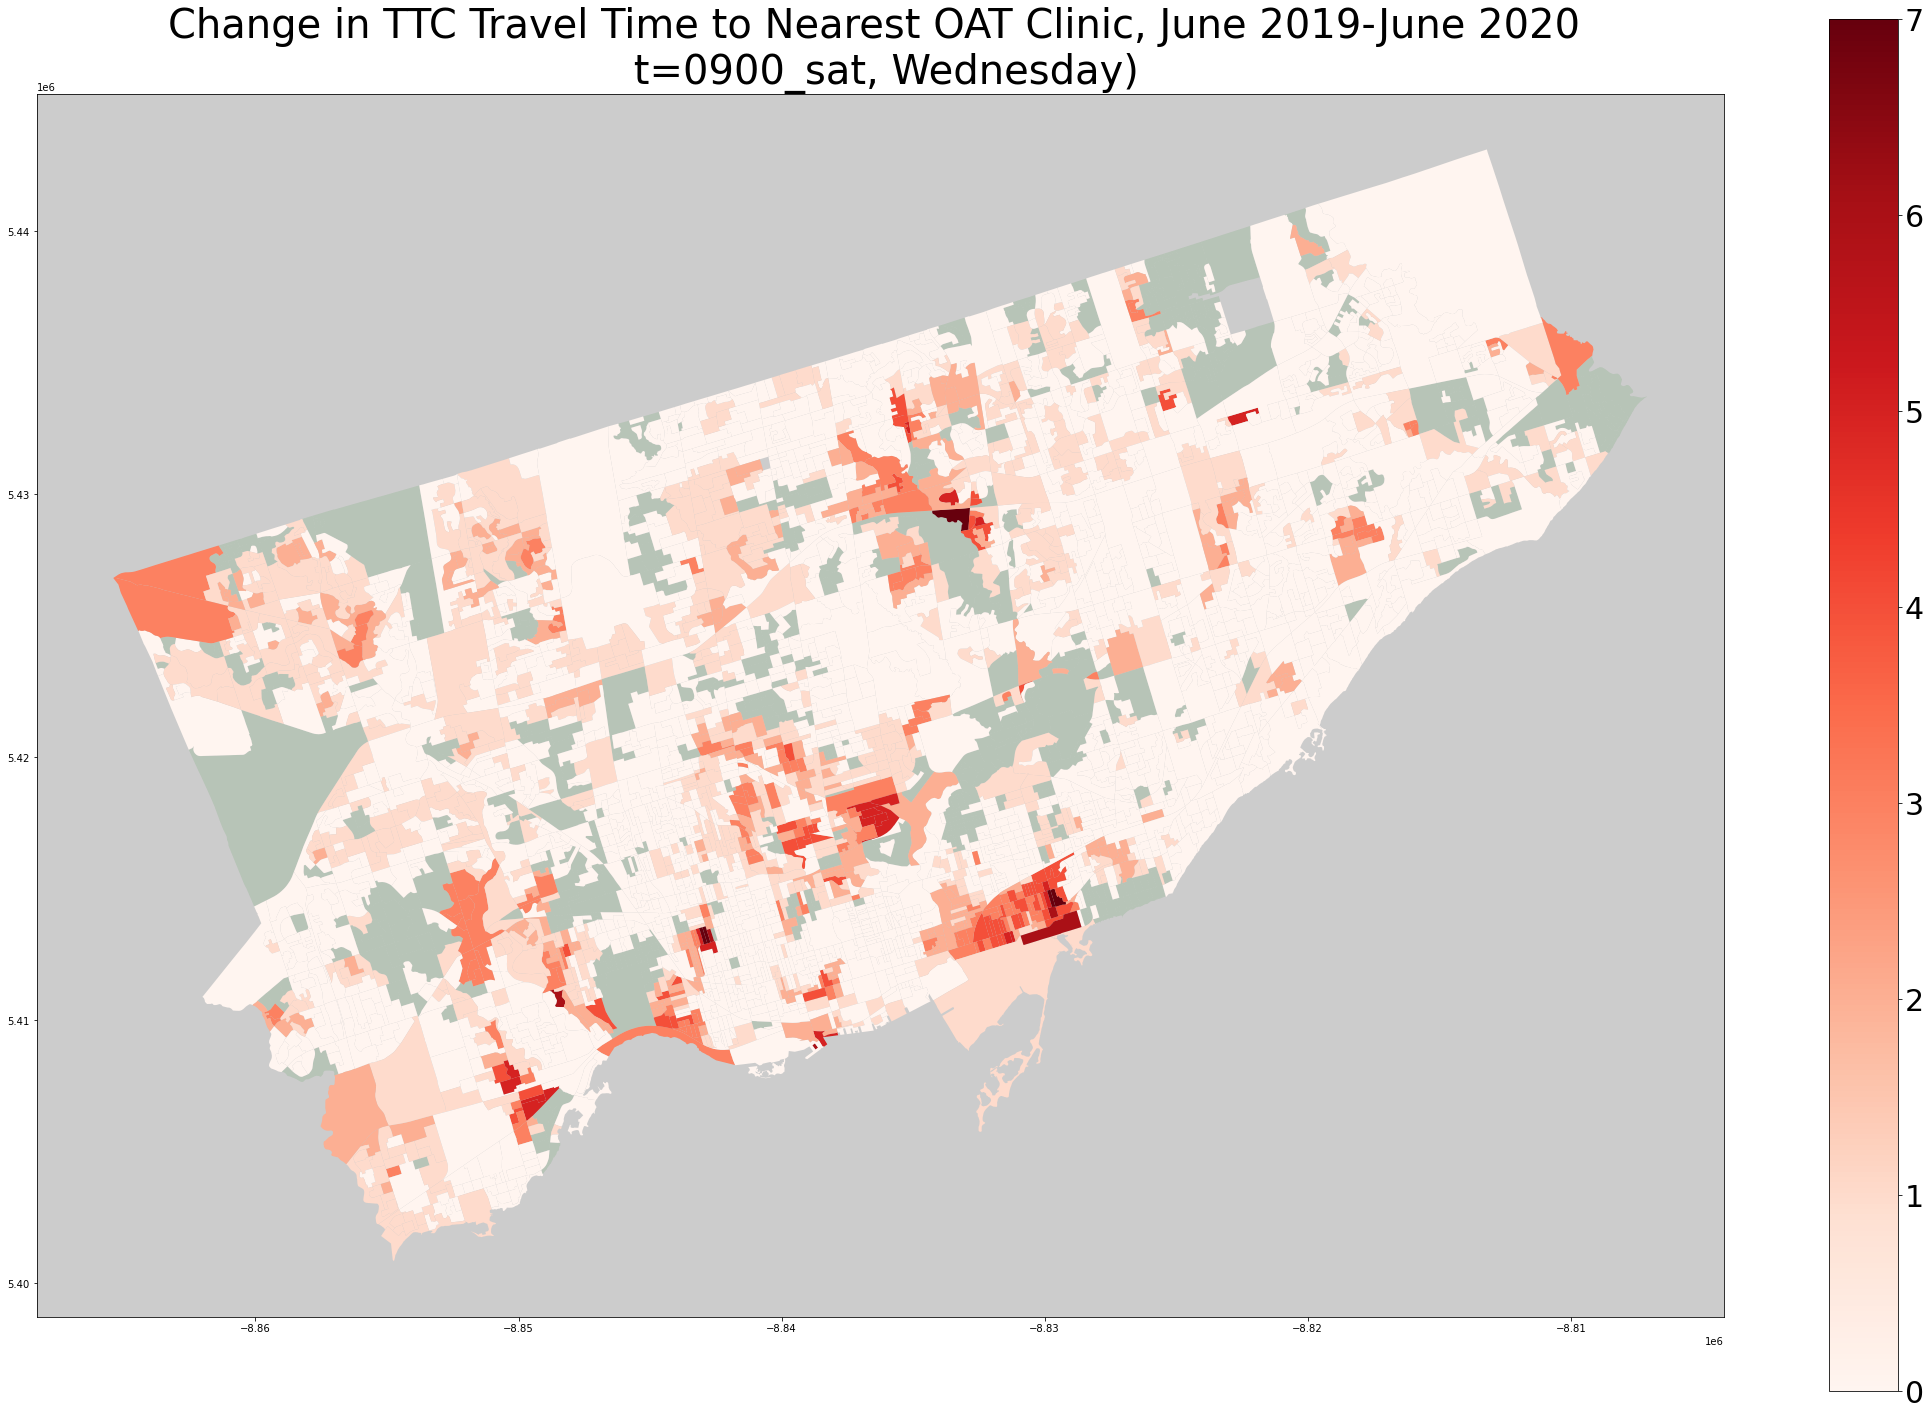

In [388]:
time = '0900_sat'
fig, ax = plt.subplots(figsize=(30, 20))
travel_diff_dic[time][travel_diff_dic[time]['neg_access']==0].plot(column='diff', ax=ax, legend=True, color='green', alpha=0.1)
travel_diff_dic[time][travel_diff_dic[time]['neg_access']==1].plot(column='diff', ax=ax, cmap='Reds', legend=True)
cb_ax = fig.axes[1]
ax.patch.set_facecolor('black')
ax.patch.set_alpha(0.2)
plt.title(f"Change in TTC Travel Time to Nearest OAT Clinic, June 2019-June 2020 \n t={time}, Wednesday)", fontsize=40)
cb_ax.tick_params(labelsize=30)
plt.tight_layout()
#plt.savefig(f'/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/imgs/{time}.png')